<a href="https://colab.research.google.com/github/vir097/Data-Qaulity-Assessment/blob/main/Data_Quality_Assessment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CustomerDemographic_df = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic")

<ipython-input-2-3cf235b69edf>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic_df = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic")


# **Customer demographic data**

In [3]:
CustomerDemographic_df.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

# Customer address

In [5]:
customer_add_df = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [6]:
customer_add_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Transactions detail

In [7]:
transaction_df = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')

In [8]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# Merge dataset

In [10]:
df = transaction_df.merge(CustomerDemographic_df, on = 'customer_id').merge(customer_add_df, on = "customer_id")

In [11]:
df.head().T

,0,1,2,3,4
transaction_id,1,11065,18923,2,6862
product_id,2,1,62,3,4
customer_id,2950,2950,2950,3120,3120
transaction_date,2017-02-25 00:00:00,2017-10-16 00:00:00,2017-04-26 00:00:00,2017-05-21 00:00:00,2017-10-05 00:00:00
online_order,0.0,0.0,0.0,1.0,0.0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


# New customer

In [12]:
new_customer_df  = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')

<ipython-input-12-a356013ef12b>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer_df  = pd.read_excel("/content/drive/MyDrive/Taiyo.AI/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')


In [13]:
new_customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.05,1.3125,1.640625,1.394531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.72,0.7200,0.900000,0.765000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.03,1.0300,1.030000,1.030000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.62,0.7750,0.775000,0.775000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.250000,1.250000,4,4,1.703125


In [14]:
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

Drope unnecessary columns

In [15]:
new_customer_df.drop(columns = ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Value","Rank"],inplace=True)

# Merge old customer and new customer dataset

In [16]:
df = pd.concat([df, new_customer_df])

In [17]:
df.head().T

,0,1,2,3,4
transaction_id,1.0,11065.0,18923.0,2.0,6862.0
product_id,2.0,1.0,62.0,3.0,4.0
customer_id,2950.0,2950.0,2950.0,3120.0,3120.0
transaction_date,2017-02-25 00:00:00,2017-10-16 00:00:00,2017-04-26 00:00:00,2017-05-21 00:00:00,2017-10-05 00:00:00
online_order,0.0,0.0,0.0,1.0,0.0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20968 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  float64       
 1   product_id                           19968 non-null  float64       
 2   customer_id                          19968 non-null  float64       
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price  

# Data Preparation

In [19]:
# drop default column
df.drop('default',axis=1,inplace=True)

In [20]:
# merge female gender 
df['gender'].replace(['F','Femal'],'Female',inplace=True)

In [21]:
# merge male gender
df['gender'].replace('M','Male',inplace=True)

In [22]:
# remove unspecified gender
df = df[~(df['gender'] == 'U')]

In [23]:
df['gender'].value_counts()

Female    10510
Male       9986
Name: gender, dtype: int64

In [24]:
#Convert transaction_date column type from int date to datetime
import datetime

df["transaction_date"] = pd.to_datetime(df["transaction_date"], unit = "s")

<ipython-input-24-ca7ae87fd171>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transaction_date"] = pd.to_datetime(df["transaction_date"], unit = "s")


In [25]:
# Convert product_first_sold_date column type from int date to datetime

df["product_first_sold_date"] = pd.to_datetime(df["product_first_sold_date"], unit = "s")

<ipython-input-25-dc7c0ccf1cbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["product_first_sold_date"] = pd.to_datetime(df["product_first_sold_date"], unit = "s")


In [26]:
# Rename Deceased Indicator Values

df["deceased_indicator"].replace(["N", "Y"], ["No", "Yes"],inplace=True)

<ipython-input-26-19971634958f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deceased_indicator"].replace(["N", "Y"], ["No", "Yes"],inplace=True)


In [27]:
df["deceased_indicator"].value_counts()

No     20488
Yes        8
Name: deceased_indicator, dtype: int64

In [28]:
# Merge same states

df["state"] = df["state"].replace(["VIC", "NSW", "QLD"], ["Victoria", "New South Wales", "Queensland"])

Convert DOB to Age

In [29]:
# get age of person
def age(born):
  today= datetime.date.today()
  return today.year - born.year

In [30]:
# Create new column age
df['Age'] = df['DOB'].apply(lambda x: age(x))

In [31]:
# Add profit column
df["Profit"] = df["list_price"] - df["standard_cost"]

In [32]:
df.head().T

,0,1,2,3,4
transaction_id,1.0,11065.0,18923.0,2.0,6862.0
product_id,2.0,1.0,62.0,3.0,4.0
customer_id,2950.0,2950.0,2950.0,3120.0,3120.0
transaction_date,2017-02-25 00:00:00,2017-10-16 00:00:00,2017-04-26 00:00:00,2017-05-21 00:00:00,2017-10-05 00:00:00
online_order,0.0,0.0,0.0,1.0,0.0
order_status,Approved,Approved,Approved,Approved,Approved
brand,Solex,Giant Bicycles,Solex,Trek Bicycles,Giant Bicycles
product_line,Standard,Standard,Standard,Standard,Standard
product_class,medium,medium,medium,medium,high
product_size,medium,medium,medium,large,medium


# DATA INSIGHTS

In [33]:
transactions = df["transaction_id"].count()
print("Total transactions are = " + str(transactions))

Total transactions are = 19513


In [34]:
customers = df["customer_id"].nunique()
print("Number of unique customers = " + str(customers))

Number of unique customers = 3412


In [35]:
products = df["product_id"].nunique()
print("Number of unique products = " + str(products))

Number of unique products = 101


**Online orders**

In [36]:
online_order = df["online_order"].sum()
print("Number of online orders = " + str(online_order))

Number of online orders = 9587.0


In [37]:
# Approved and Disapproved Orders
orders = df["order_status"].value_counts().reset_index()
orders = pd.DataFrame(orders)
orders.columns = ["Status", "Orders"]
orders

,Status,Orders
0,Approved,19337
1,Cancelled,176


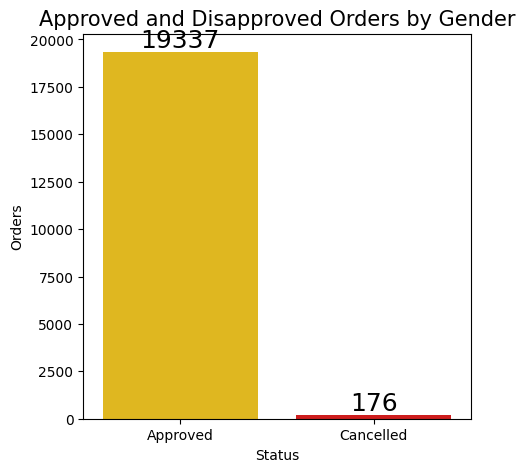

In [38]:
plt.figure(figsize = (5,5))
graph = sns.barplot(x = "Status", y = "Orders", data = orders, palette = "hot_r")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Approved and Disapproved Orders by Gender", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

      Status  Gender  Orders
0   Approved  Female    9905
1   Approved    Male    9432
2  Cancelled  Female      92
3  Cancelled    Male      84
---------------------------------------------------------------------------------------------------------------------------------------


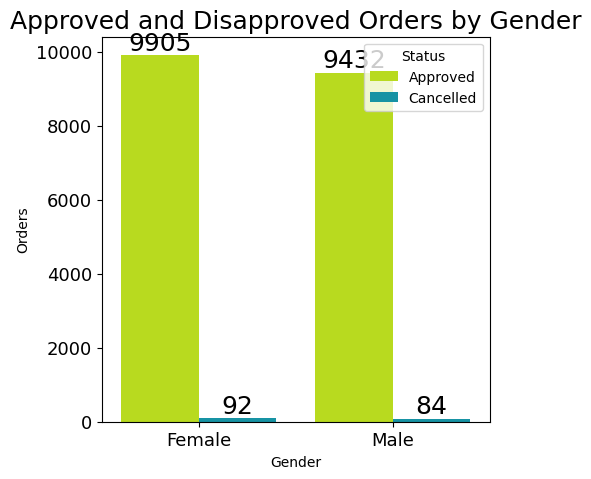

In [39]:
# Approved and Disapproved Orders by Gender


gender_orders = df.groupby(["order_status", "gender"])["transaction_id"].agg(["count"])
gender_orders = gender_orders.reset_index()
gender_orders.columns = ["Status", "Gender", "Orders"]
print(gender_orders)

print('---'*45)

plt.figure(figsize = (5,5))
graph = sns.barplot(x = "Gender", y = "Orders",  hue = "Status", data = gender_orders, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Approved and Disapproved Orders by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Brands

            Brand  Total
0           Solex   4171
1  Giant Bicycles   3236
2        WeareA2B   3203
3      OHM Cycles   2976
4   Trek Bicycles   2914
5  Norco Bicycles   2827
---------------------------------------------------------------------------------------------------------------------------------------


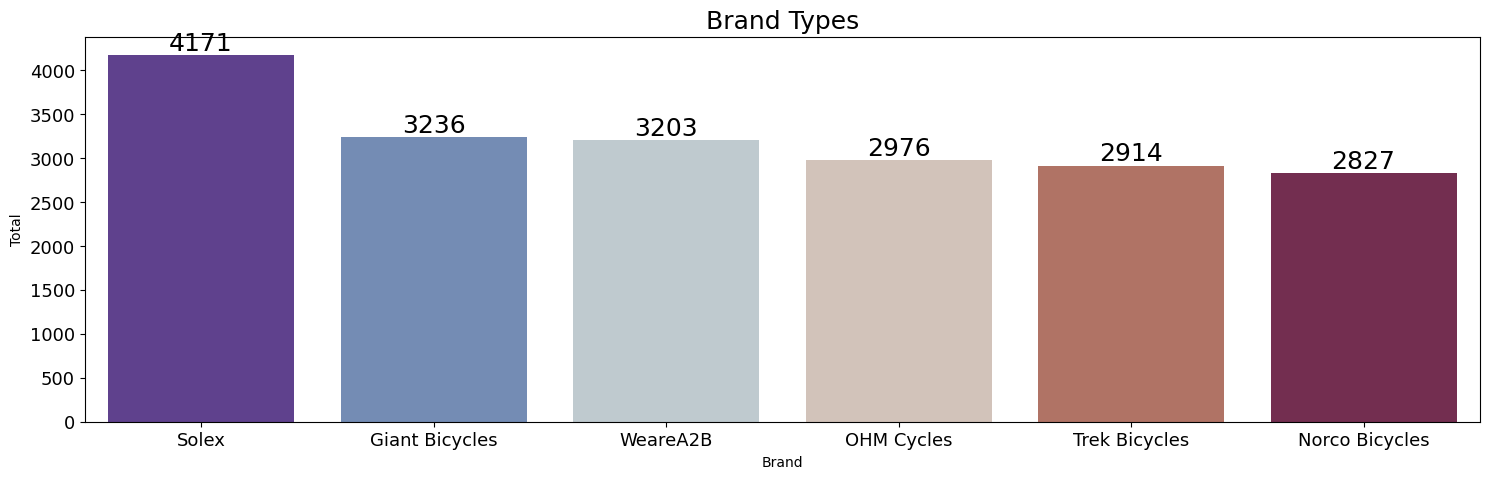

In [40]:
brands = df["brand"].value_counts()
brands = pd.DataFrame(brands).reset_index()
brands.columns = ["Brand", "Total"]
print(brands)
print('---'*45)

plt.figure(figsize = (18,5))
graph = sns.barplot(x = "Brand", y = "Total", data = brands, palette = "twilight_shifted")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Brand Types", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()
     

**Product Lines**

  Product Line  Total
0     Standard  13851
1         Road   3871
2      Touring   1193
3     Mountain    412
---------------------------------------------------------------------------------------------------------------------------------------


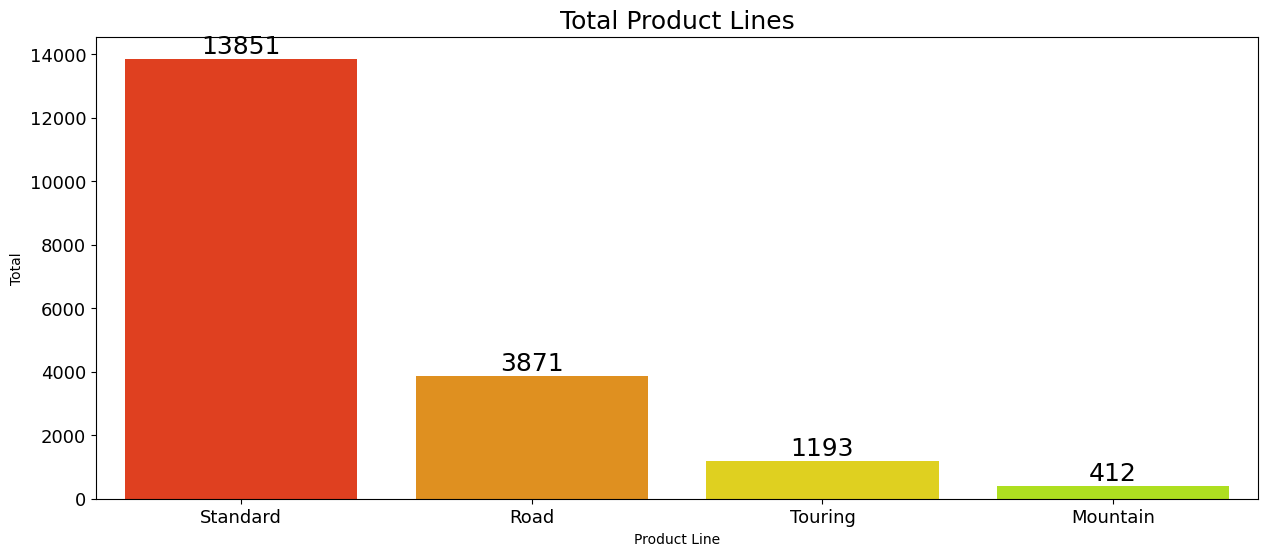

In [41]:
product_line = df["product_line"].value_counts()
product_line = pd.DataFrame(product_line).reset_index()
product_line.columns = ["Product Line", "Total"]
print(product_line)

print('---'*45)

plt.figure(figsize = (15, 6))
sns.color_palette("Set3", 9)
graph = sns.barplot(x = "Product Line", y = "Total", data = product_line, palette = "prism")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Product Lines", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Product Classes

  Product Class  Total
0        medium  13477
1          high   2945
2           low   2905
---------------------------------------------------------------------------------------------------------------------------------------


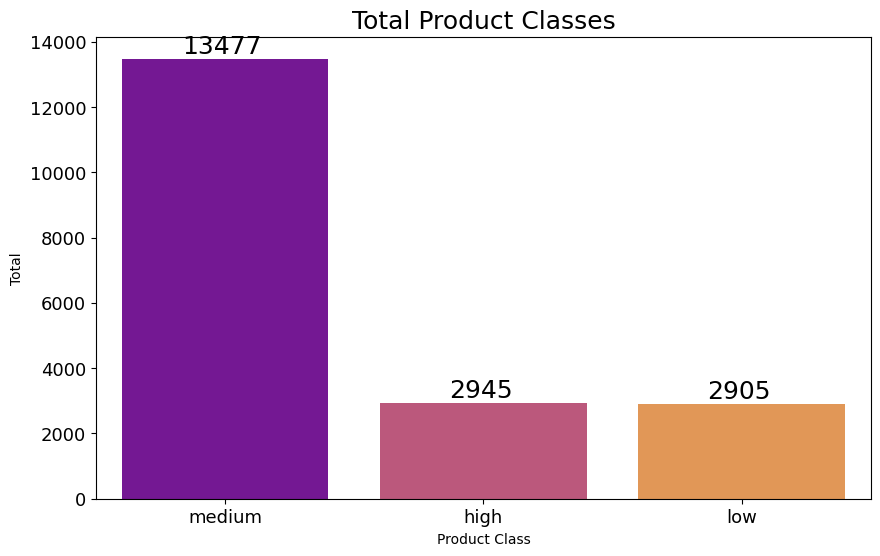

In [42]:
product_classes = df["product_class"].value_counts()
product_classes = pd.DataFrame(product_classes).reset_index()
product_classes.columns = ["Product Class", "Total"]
print(product_classes)

print('---'*45)

plt.figure(figsize = (10,6))
graph = sns.barplot(x = "Product Class", y = "Total", data = product_classes, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Product Classes", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Total Cost of Product Classes

    Class        Cost
0    high  2118983.23
1     low  1513949.58
2  medium  7108044.82
---------------------------------------------------------------------------------------------------------------------------------------


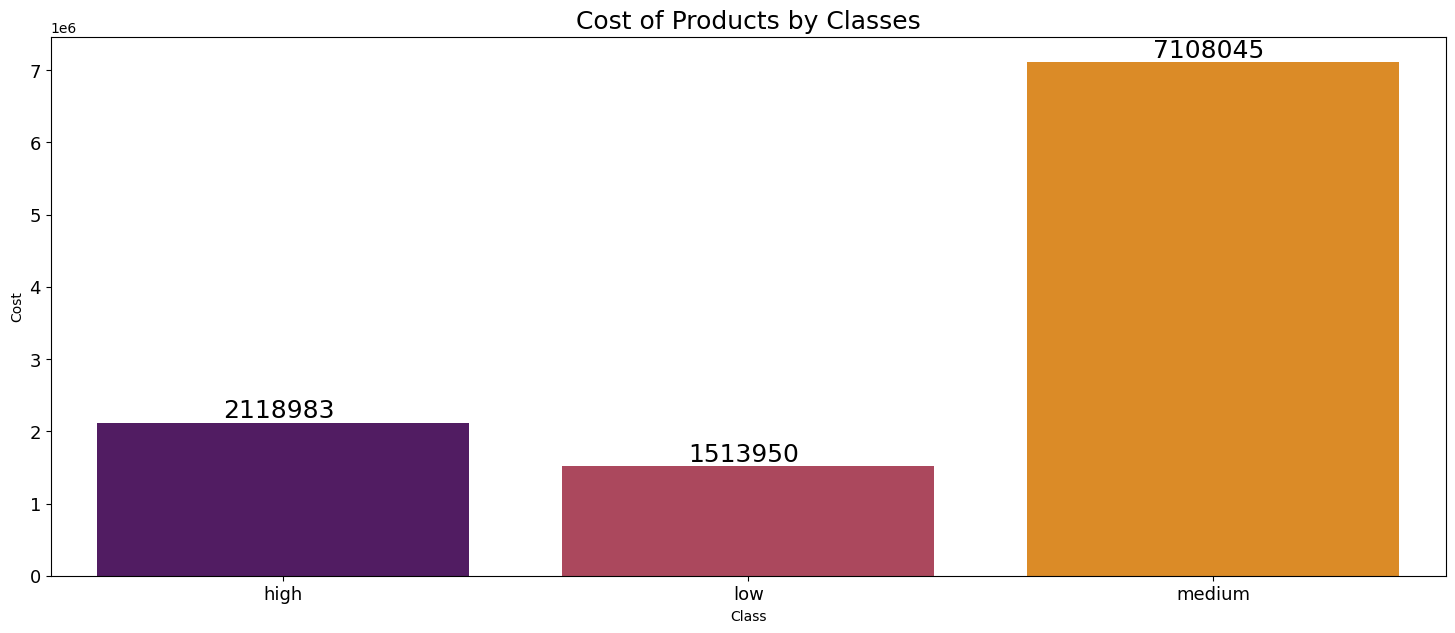

In [43]:
cpc = df.groupby(["product_class"])["standard_cost"].agg(["sum"]).reset_index()
cpc.columns = ["Class", "Cost"]
print(cpc)

print('---'*45)

plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Class", y = "Cost", data = cpc, palette = "inferno")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cost of Products by Classes", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Minimum Cost of Products by Class

---------------------------------------------------------------------------------------------------------------------------------------


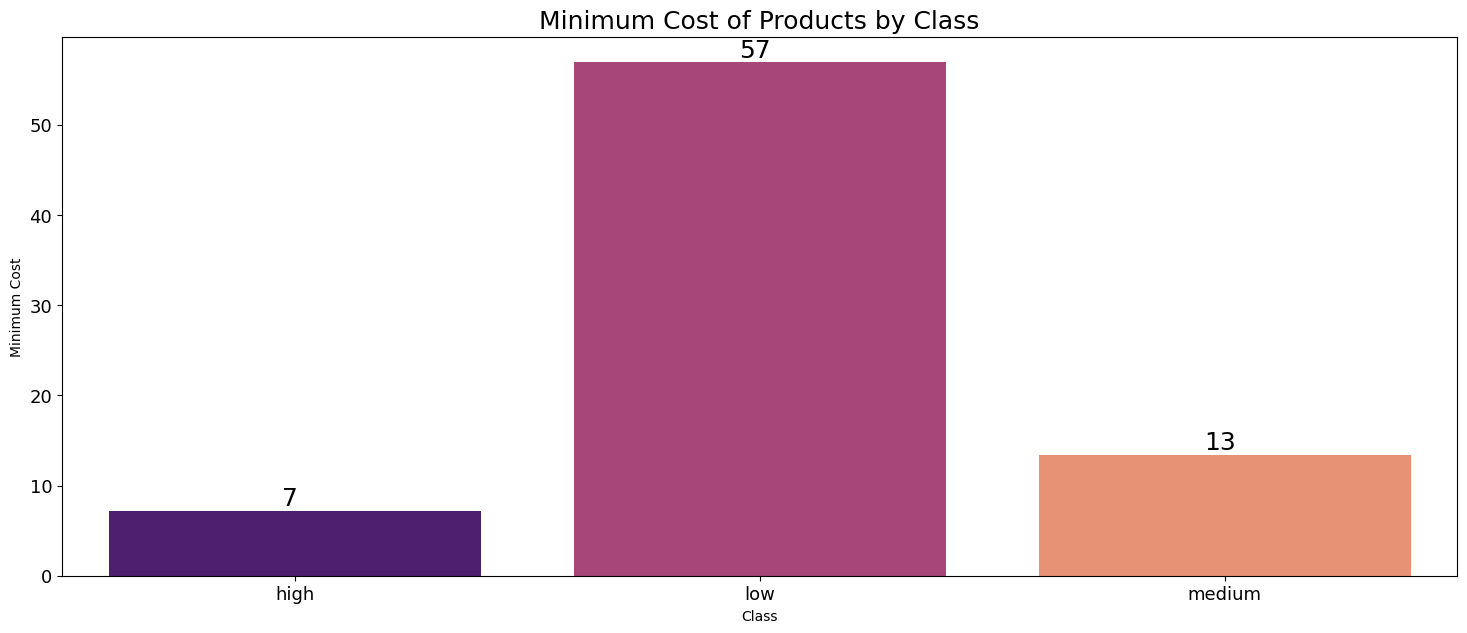

In [44]:
cpc = df.groupby(["product_class"])["standard_cost"].agg(["min"]).reset_index()
cpc.columns = ["Class", "Minimum Cost"]
cpc


print('---'*45)

plt.figure(figsize = (18,7))
graph = sns.barplot(x = "Class", y = "Minimum Cost", data = cpc, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Cost of Products by Class", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Maximum Cost of Product by Class

    Class  Maximum Cost
0    high       1759.85
1     low       1531.42
2  medium       1610.90
---------------------------------------------------------------------------------------------------------------------------------------


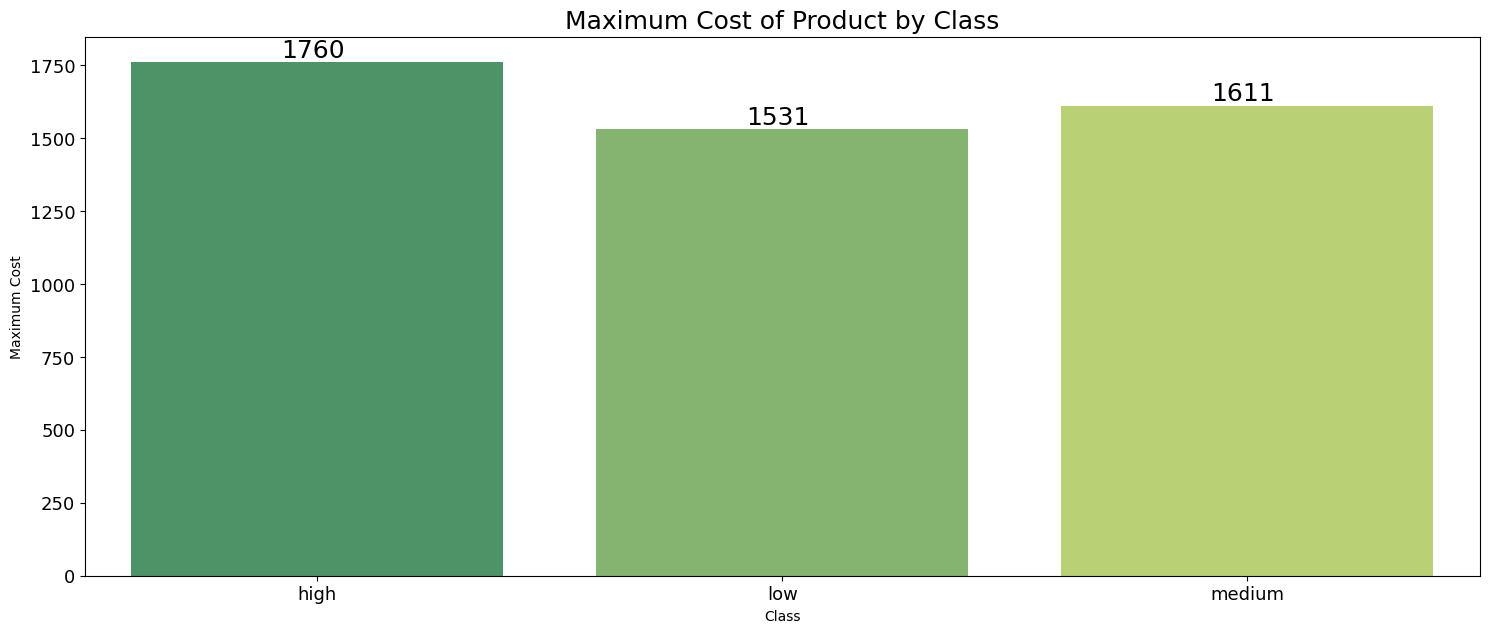

In [45]:
cpc = df.groupby(["product_class"])["standard_cost"].agg(["max"]).reset_index()
cpc.columns = ["Class", "Maximum Cost"]
print(cpc)

print('---'*45)

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Class", y = "Maximum Cost", data = cpc, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Maximum Cost of Product by Class", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Total Revenue by Product Class

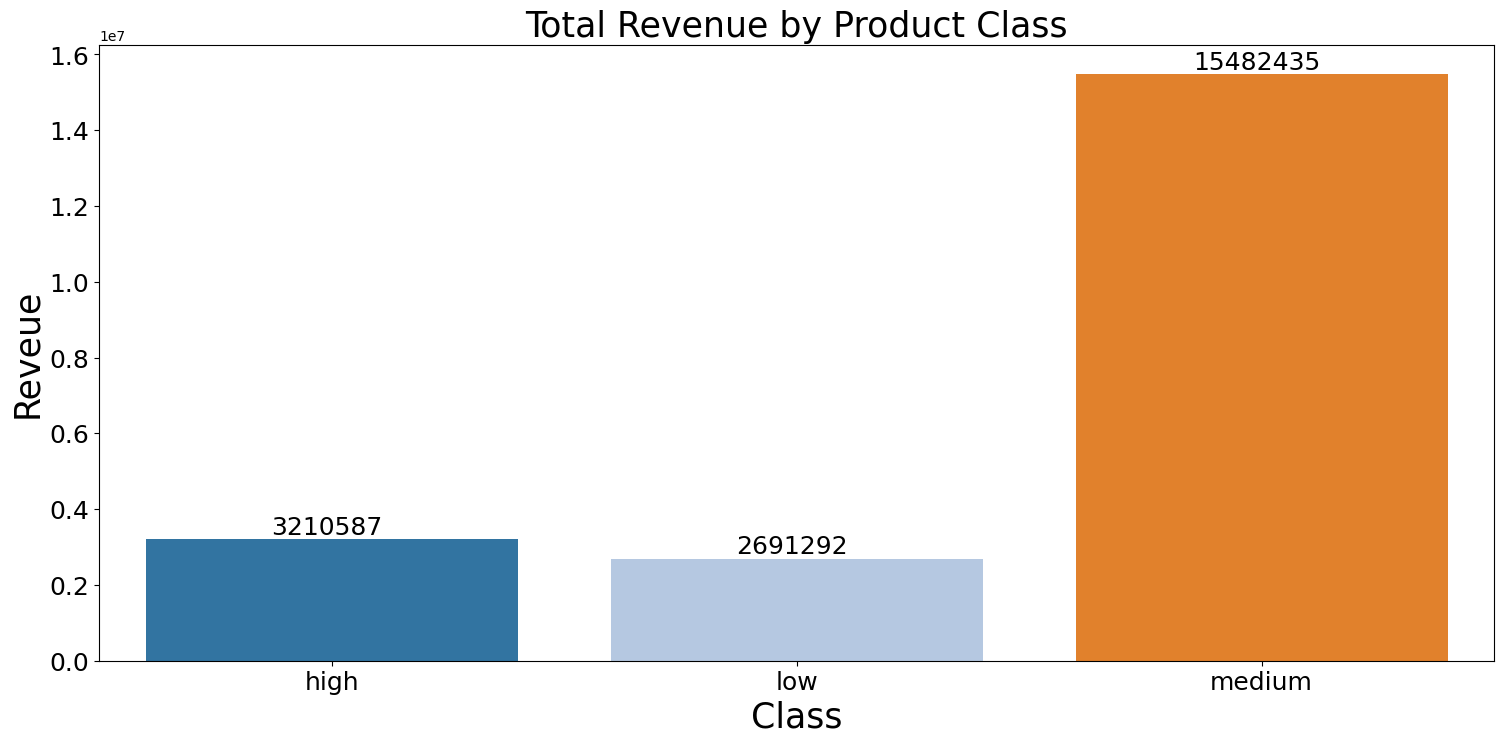

In [47]:
cps = df.groupby(["product_class"])["list_price"].agg(["sum"]).reset_index()
cps.columns = ["Class", "Revenue"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Revenue", data = cps, palette = "tab20")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Reveue", size = 25)
plt.show()

Total Profit by Product Class

In [49]:
tp = df.groupby(["product_class"])["Profit"].agg(["sum"]).reset_index()
tp.columns = ["Class", "Profit"]
tp

,Class,Profit
0,high,1091603.42
1,low,1177342.53
2,medium,8374390.23


Minimum Revenue by Product Class

In [51]:
mrp = df.groupby("product_class")["list_price"].agg(["min"]).reset_index()
mrp.columns = ["Class", "Minimum Revenue"]
mrp

,Class,Minimum Revenue
0,high,12.01
1,low,71.16
2,medium,60.34


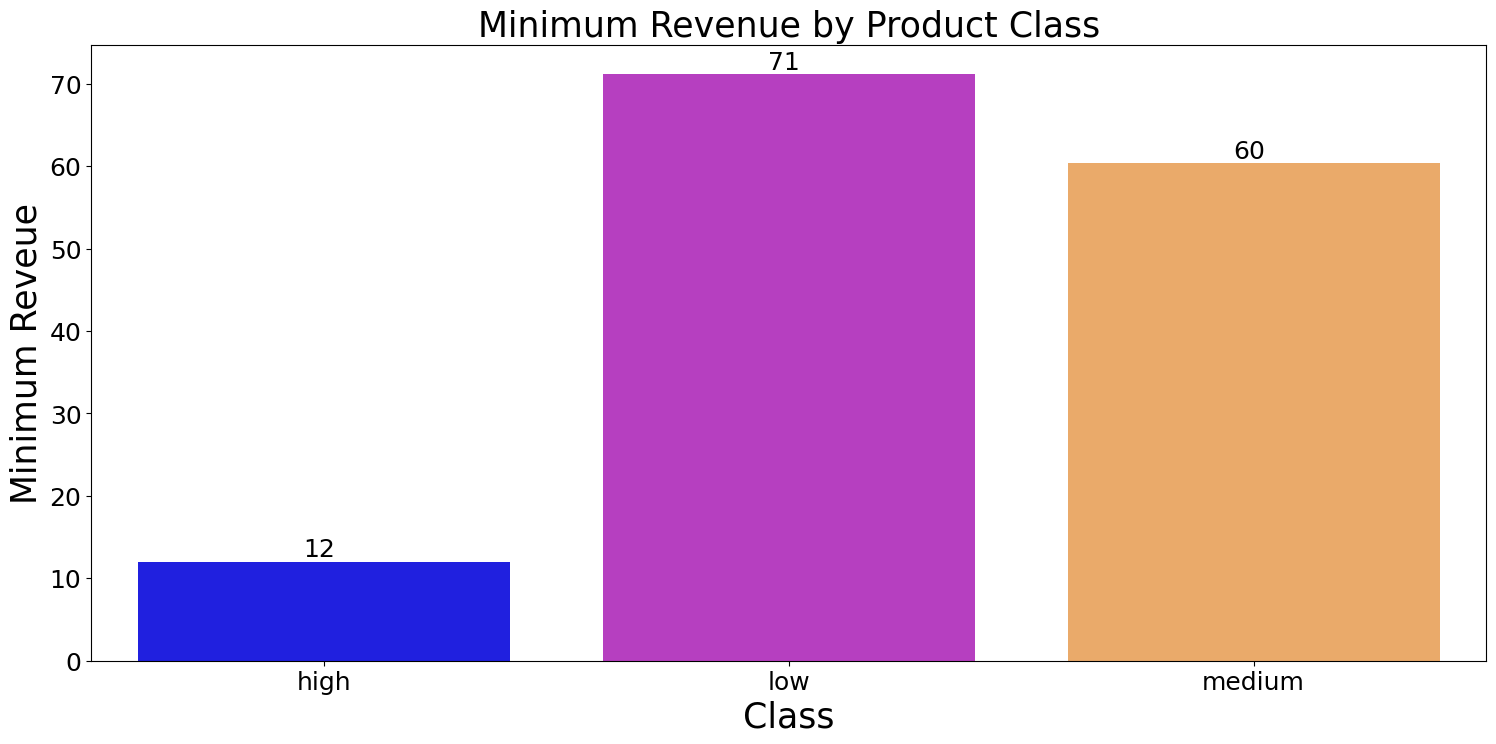

In [52]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Minimum Revenue", data = mrp, palette = "gnuplot2")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Minimum Reveue", size = 25)
plt.show()

Maximum Revenue by Product Class

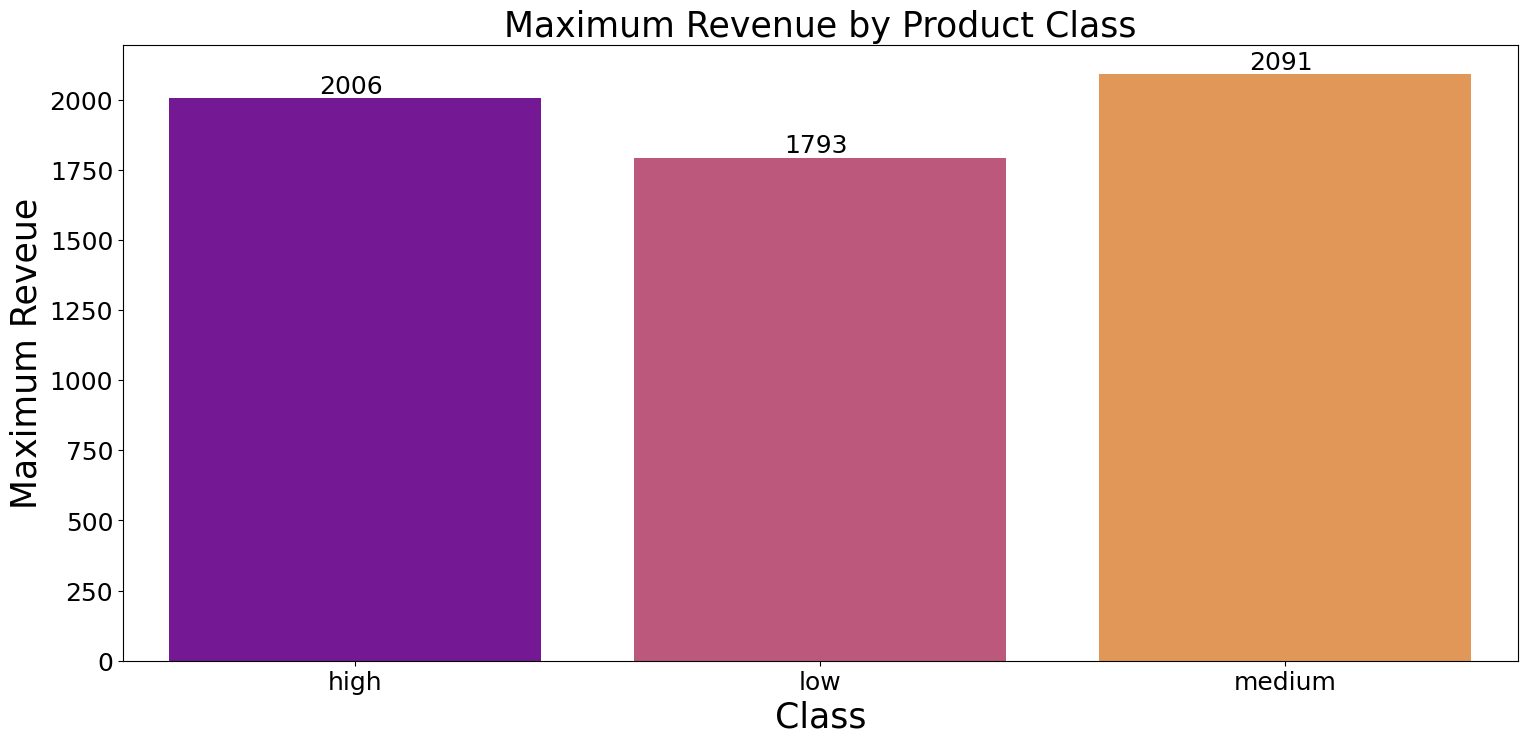

In [53]:
max_r = df.groupby(["product_class"])["list_price"].agg(["max"]).reset_index()
max_r.columns = ["Class", "Maximum Revenue"]
max_r

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Class", y = "Maximum Revenue", data = max_r, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Maximum Revenue by Product Class", size = 25)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Class", size = 25)
plt.ylabel("Maximum Reveue", size = 25)
plt.show()

**7-Product Size**

Product Size by Items

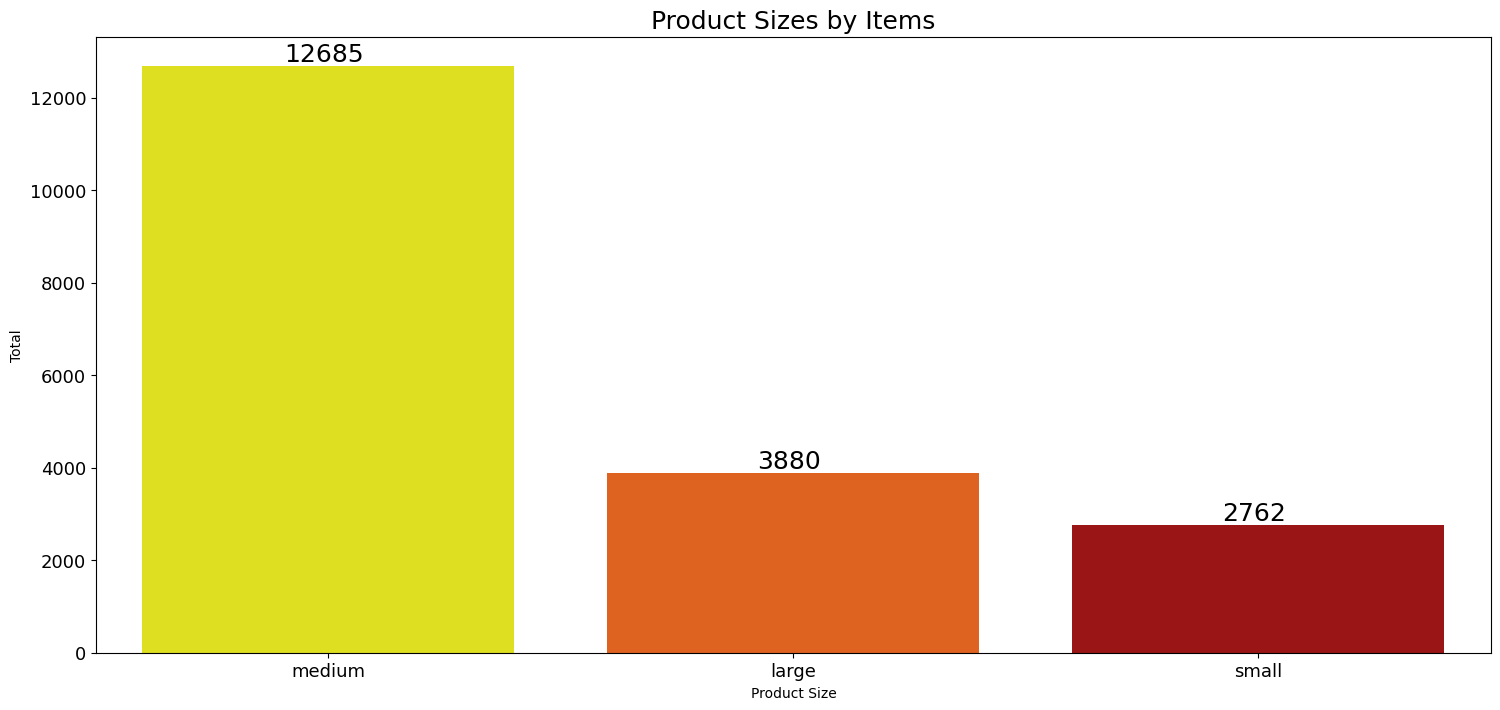

In [54]:
product_size = df["product_size"].value_counts()
product_size = pd.DataFrame(product_size).reset_index()
product_size.columns = ["Product Size", "Total"]
product_size

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Product Size", y = "Total", data = product_size, palette = "hot_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Product Sizes by Items", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()
     

Profits by Product Sizes

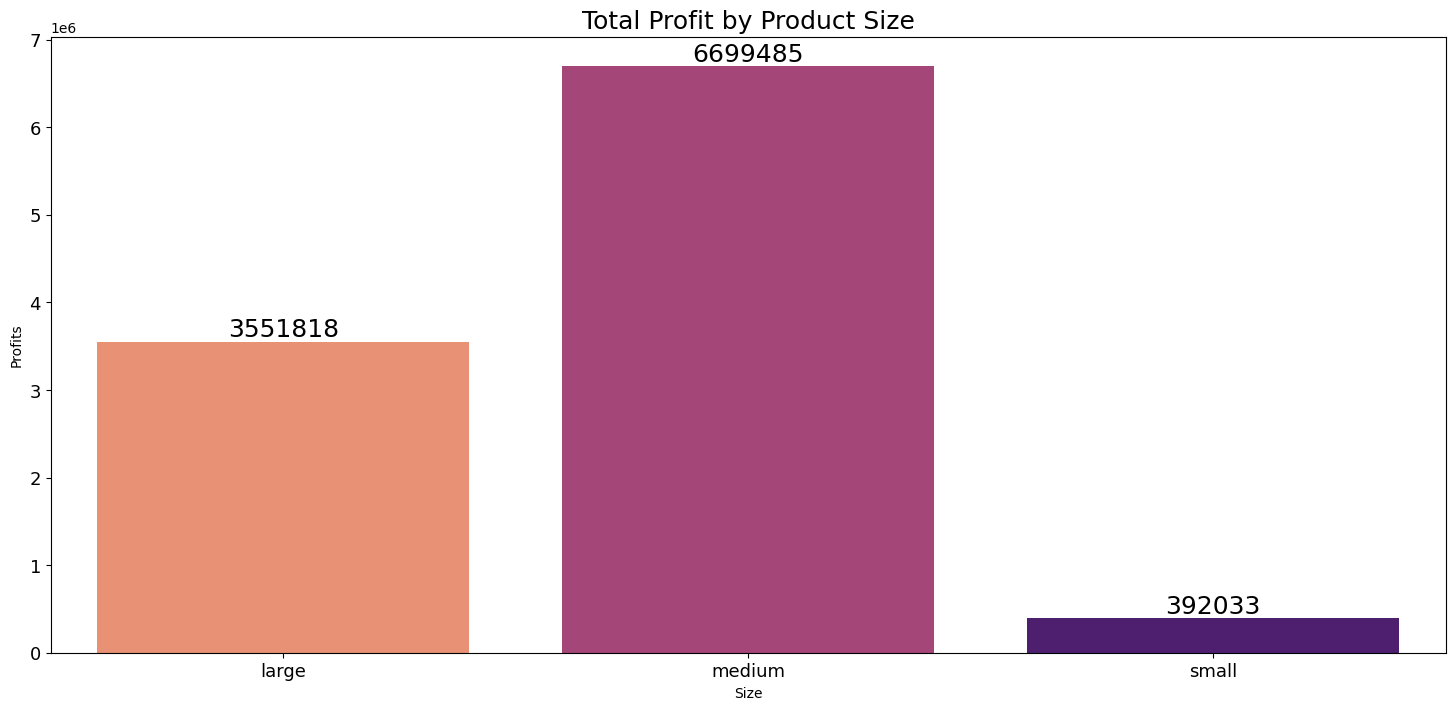

In [55]:
profit_size = df.groupby(["product_size"])["Profit"].agg(["sum"]).reset_index()
profit_size.columns = ["Size", "Profits"]
profit_size

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Profits", data = profit_size, palette = "magma_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Total Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Maximum Profit by Size

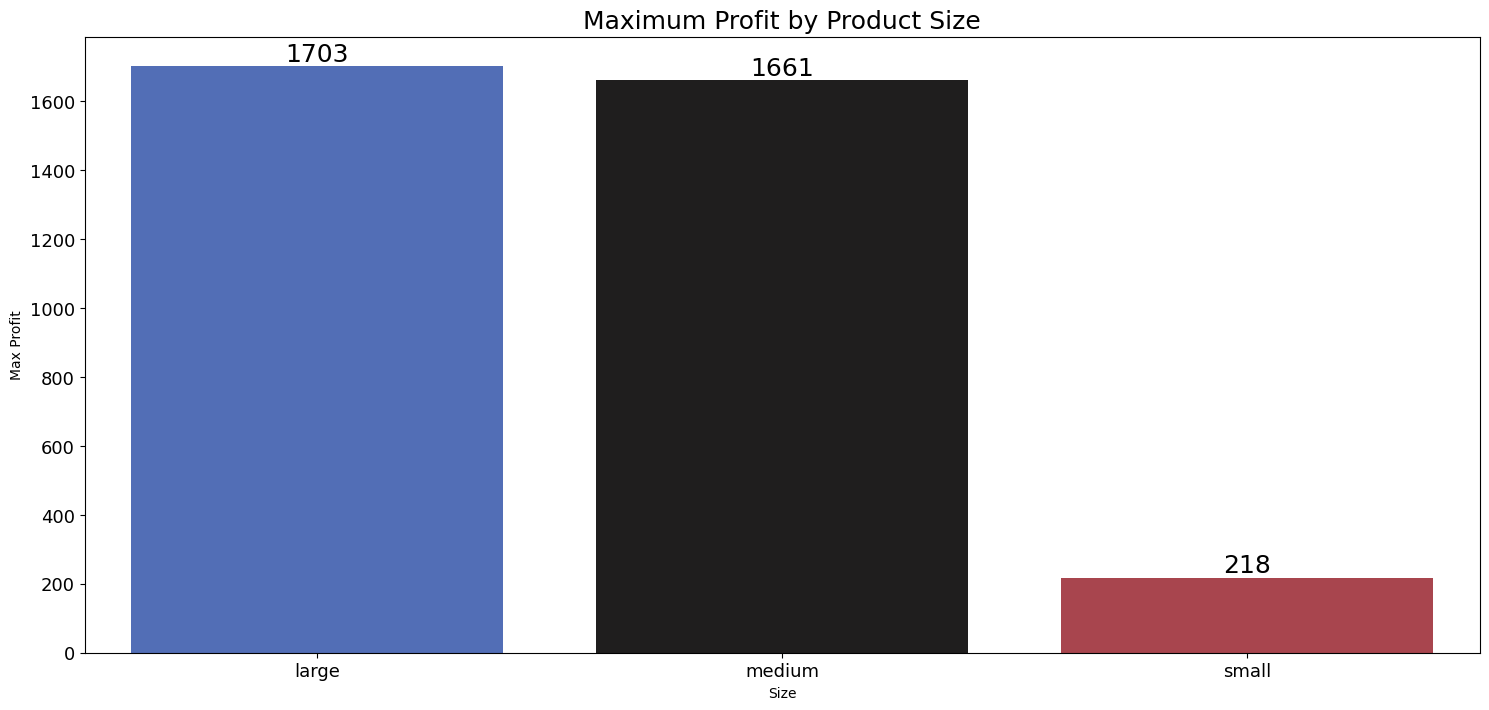

In [56]:
mps = df.groupby(["product_size"])["Profit"].agg(["max"]).reset_index()
mps.columns = ["Size", "Max Profit"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Max Profit", data = mps, palette = "icefire")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Minimum Profit by Product Size

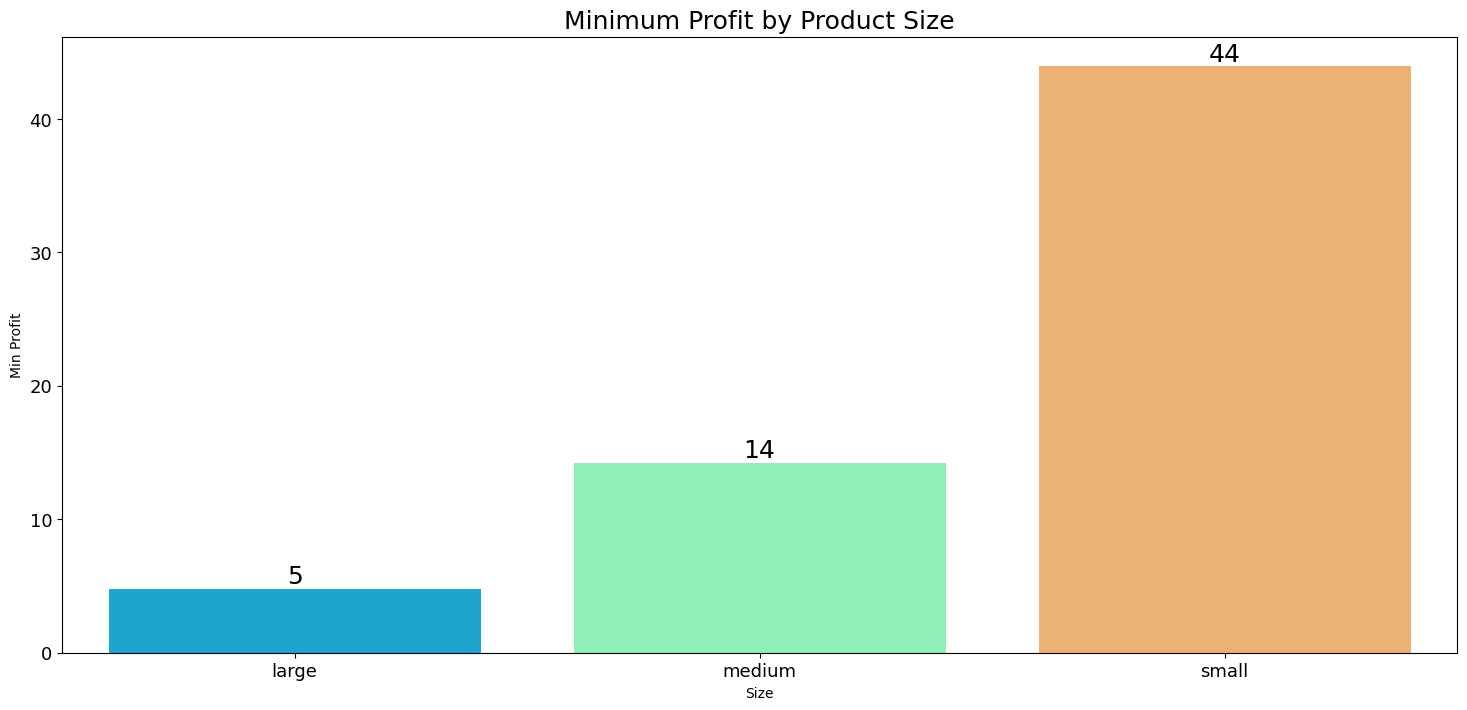

In [57]:
min_ps = df.groupby(["product_size"])["Profit"].agg(["min"]).reset_index()
min_ps.columns = ["Size", "Min Profit"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Min Profit", data = min_ps, palette = "rainbow")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Profit by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Total Revenue by Size

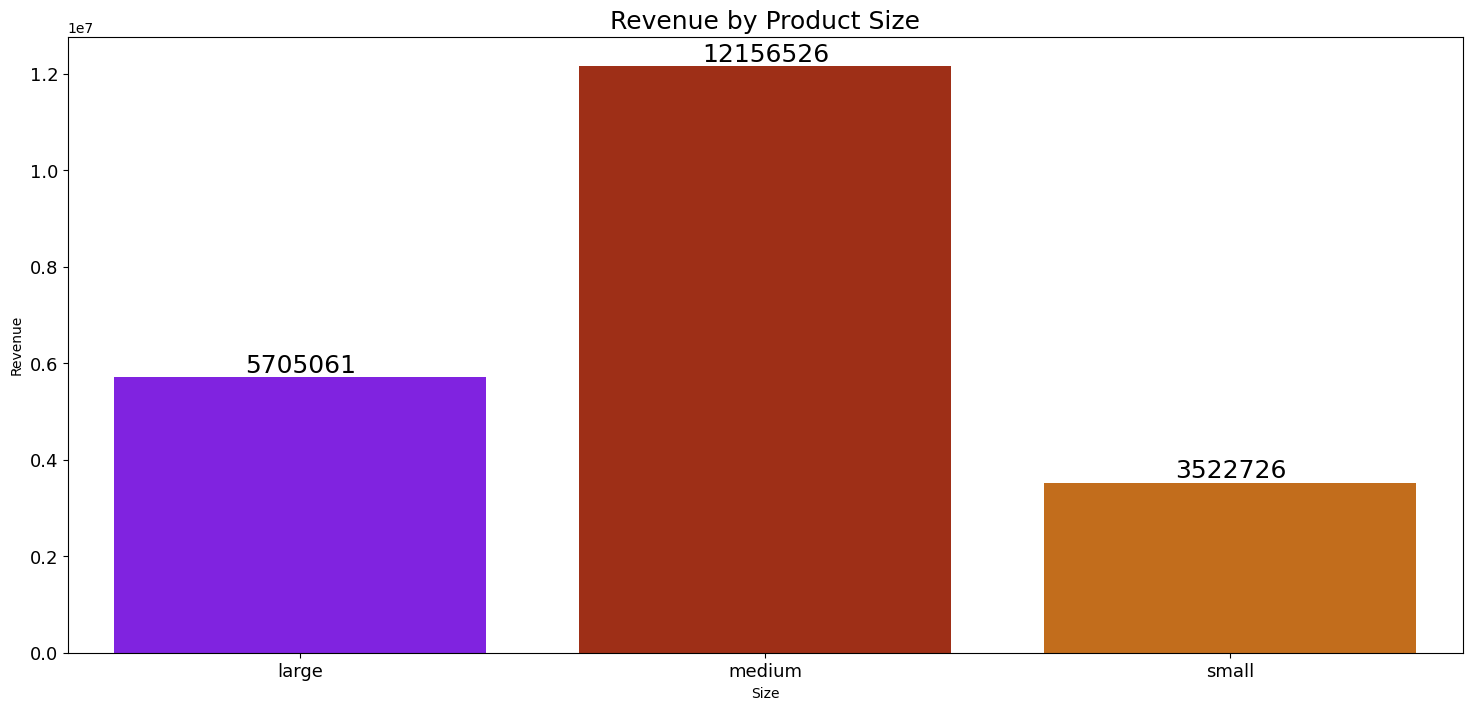

In [58]:
selling_size = df.groupby(["product_size"])["list_price"].agg(["sum"]).reset_index()
selling_size.columns = ["Size", "Revenue"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Revenue", data = selling_size, palette = "gnuplot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Revenue by Product Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Maximum Products Selling Price by Size

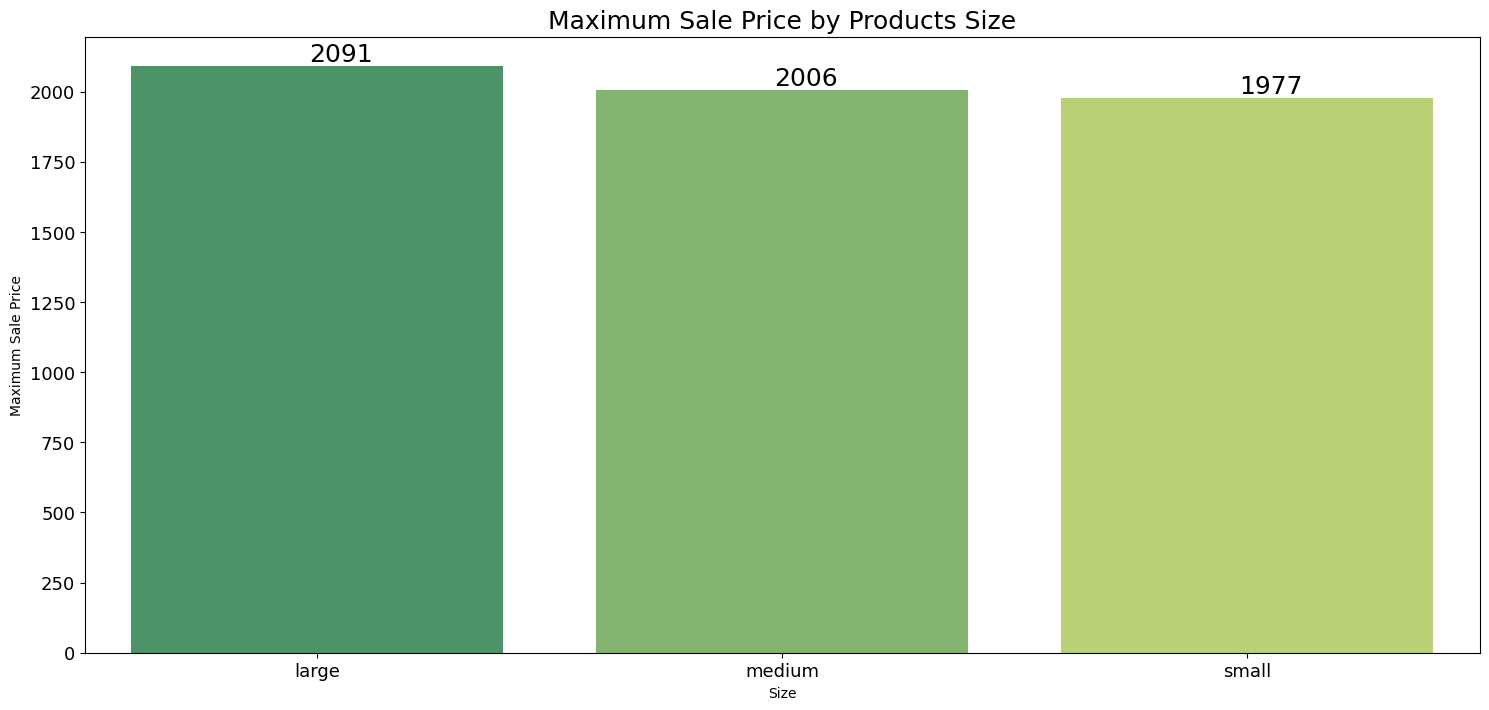

In [59]:
costly_products = df.groupby(["product_size"])["list_price"].agg(["max"]).reset_index()
costly_products.columns = ["Size", "Maximum Sale Price"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Maximum Sale Price", data = costly_products, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Sale Price by Products Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Minimum Sale Price by Products Size

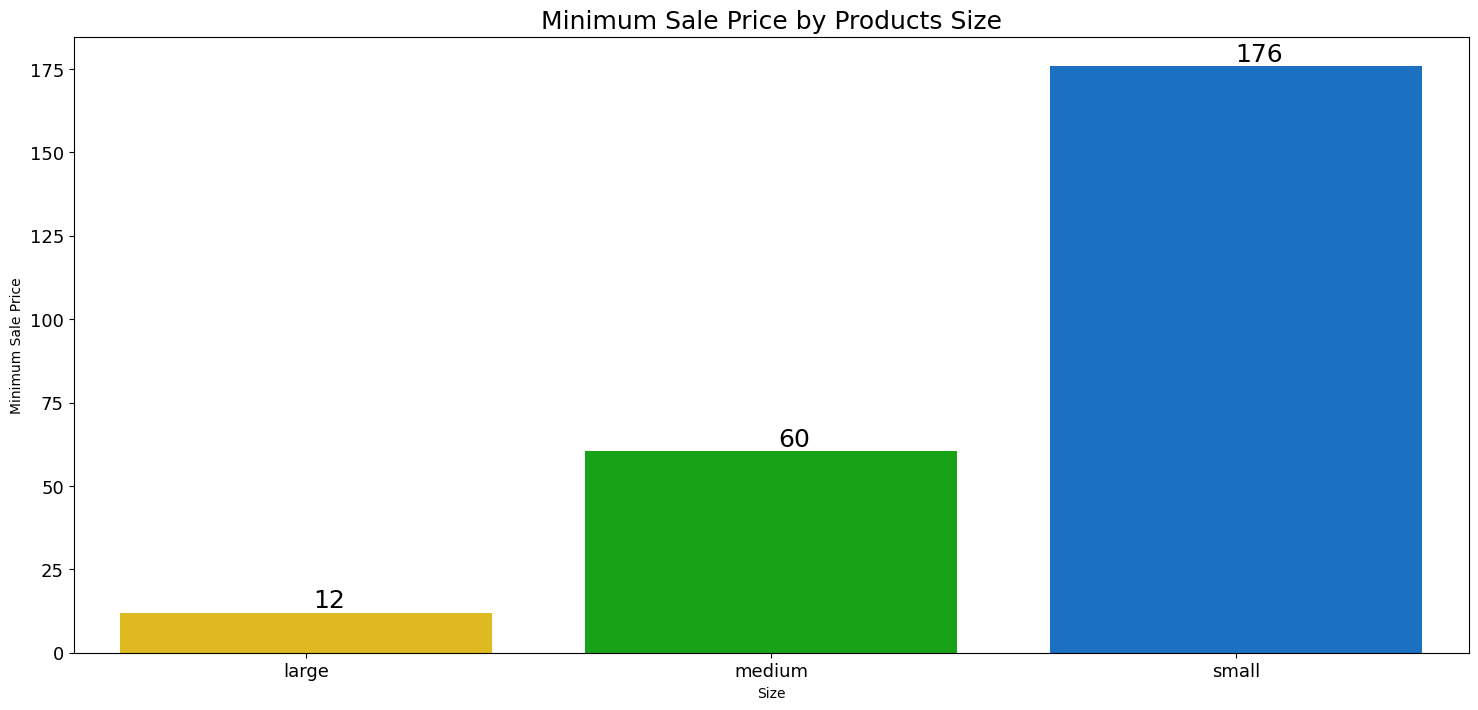

In [60]:
msp_ps = df.groupby(["product_size"])["list_price"].agg(["min"]).reset_index()
msp_ps.columns = ["Size", "Minimum Sale Price"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Size", y = "Minimum Sale Price", data = msp_ps, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Minimum Sale Price by Products Size", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**8-Brands**

Top 5 Cheapest Brands

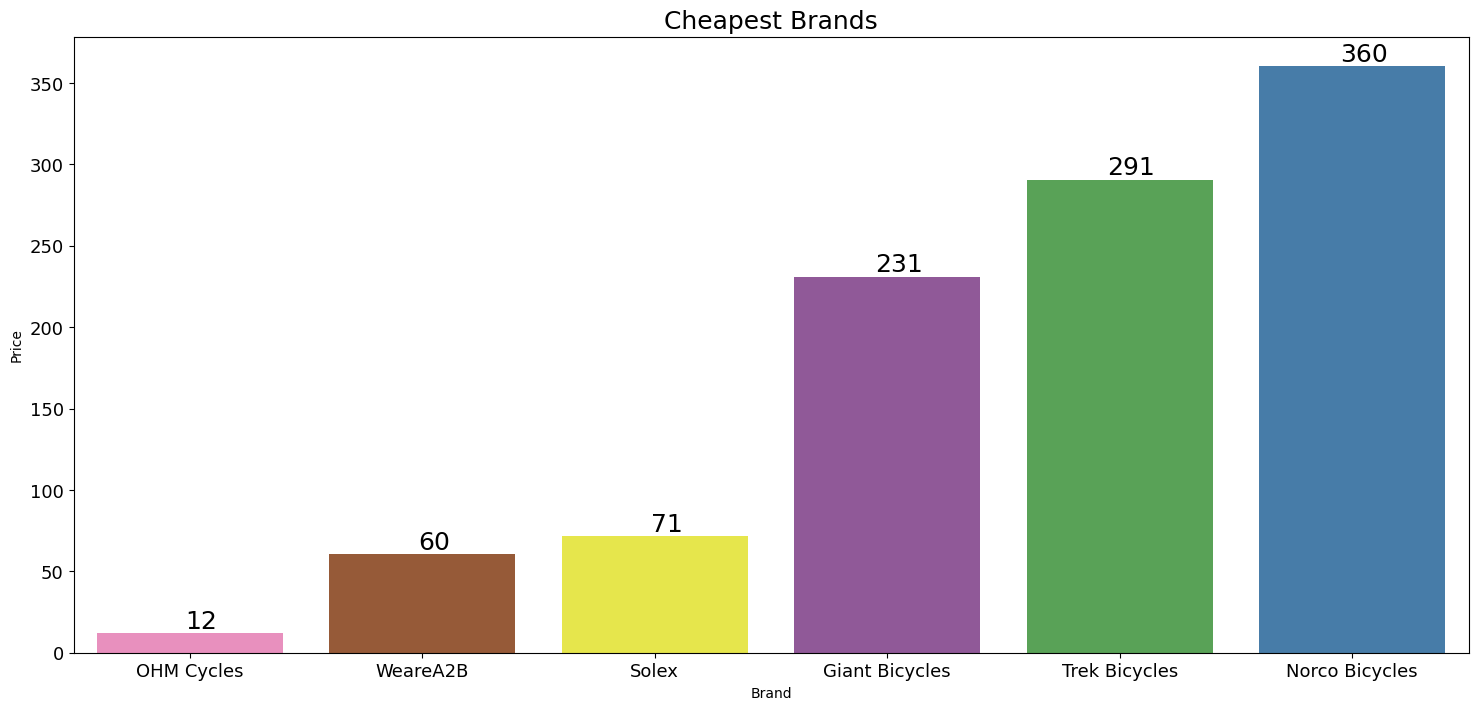

In [61]:
cheap = df.groupby("brand")["list_price"].agg("min").sort_values(ascending = True)
cheap = pd.DataFrame(cheap).reset_index()
cheap.columns = ["Brand", "Price"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Price", data = cheap, palette = "Set1_r")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Cheapest Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Top 5 Expensive Brands

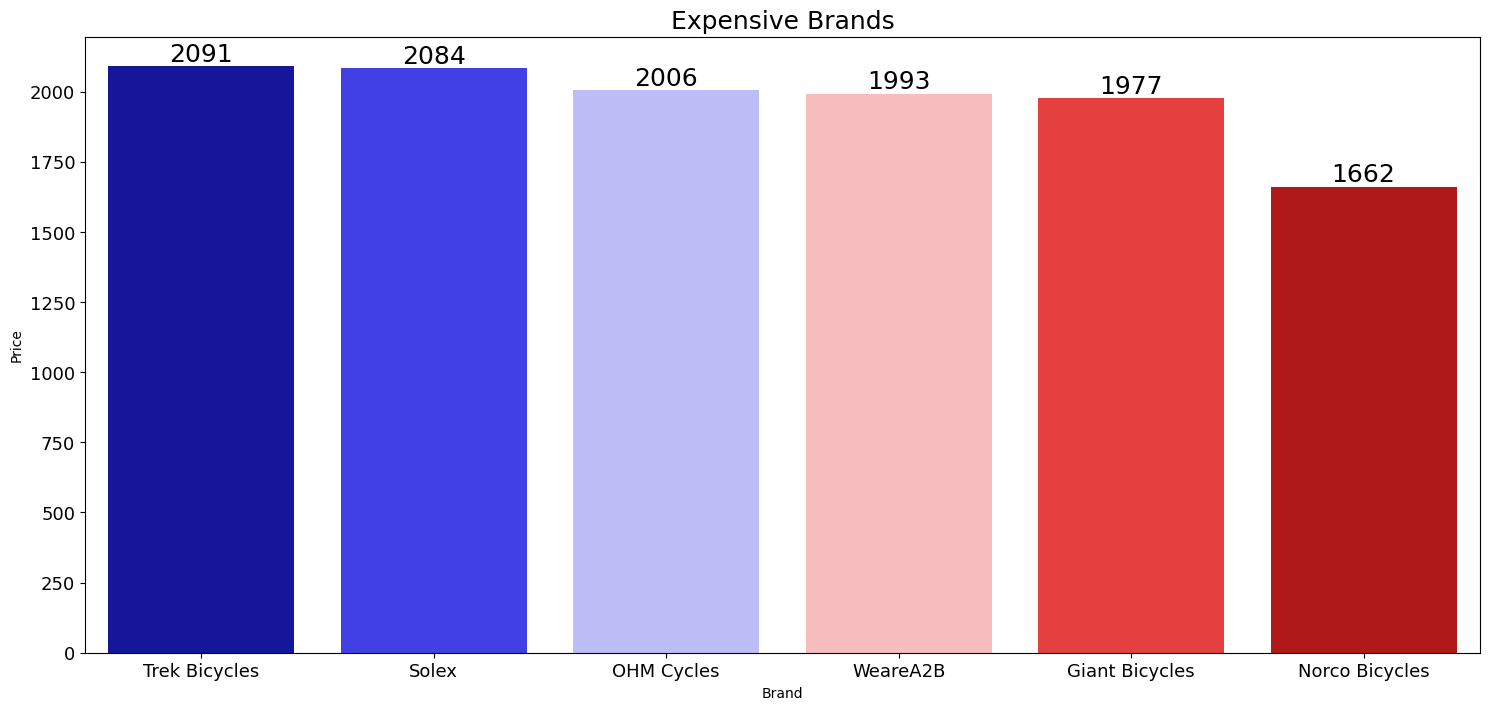

In [62]:
expensive = df.groupby("brand")["list_price"].agg("max").sort_values(ascending = False)
expensive = pd.DataFrame(expensive).reset_index()
expensive.columns = ["Brand", "Price"]


plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Price", data = expensive, palette = "seismic")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Expensive Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Maximum Profit by Brand

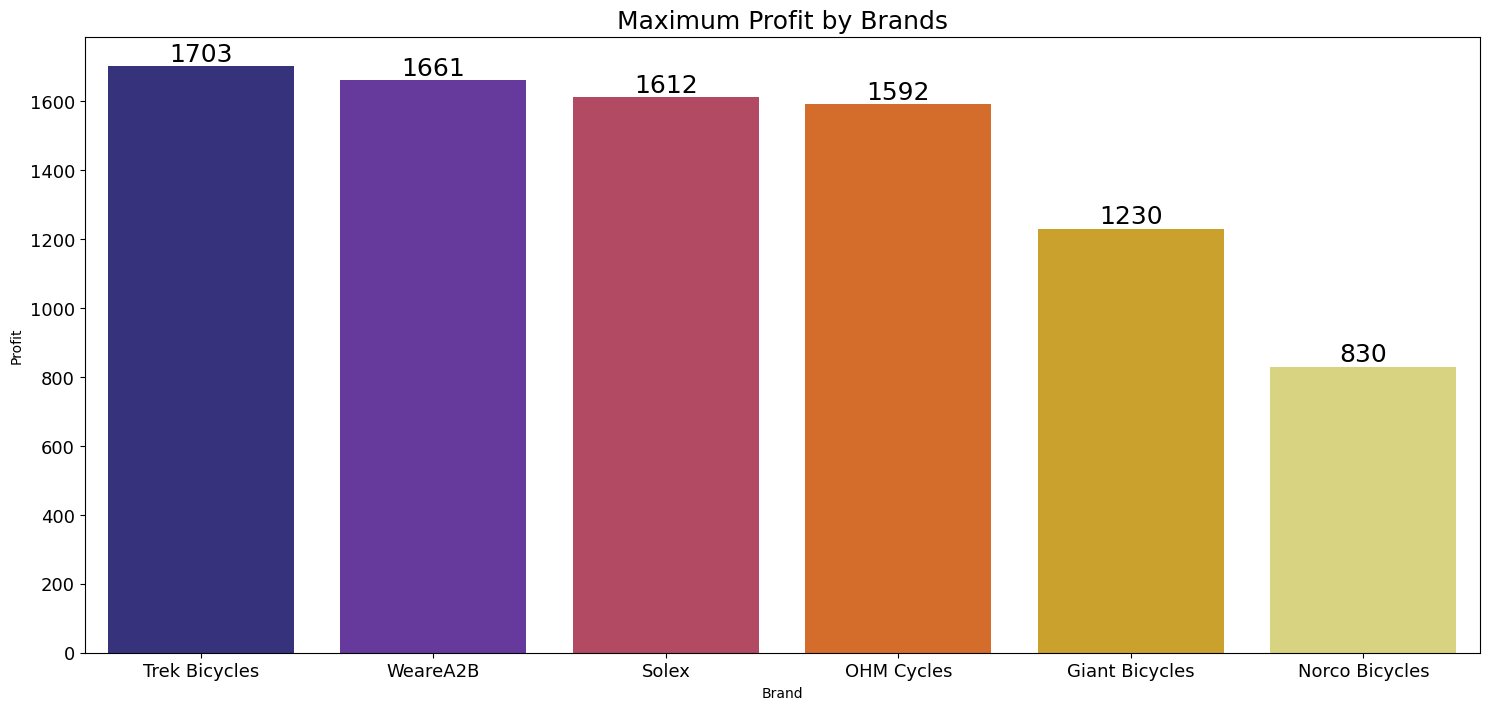

In [63]:
profit_brand = df.groupby("brand")["Profit"].agg("max").sort_values(ascending = False)
profit_brand = pd.DataFrame(profit_brand).reset_index()
profit_brand.columns = ["Brand", "Profit"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Profit", data = profit_brand, palette = "CMRmap")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Maximum Profit by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Minimum Profit by Brands

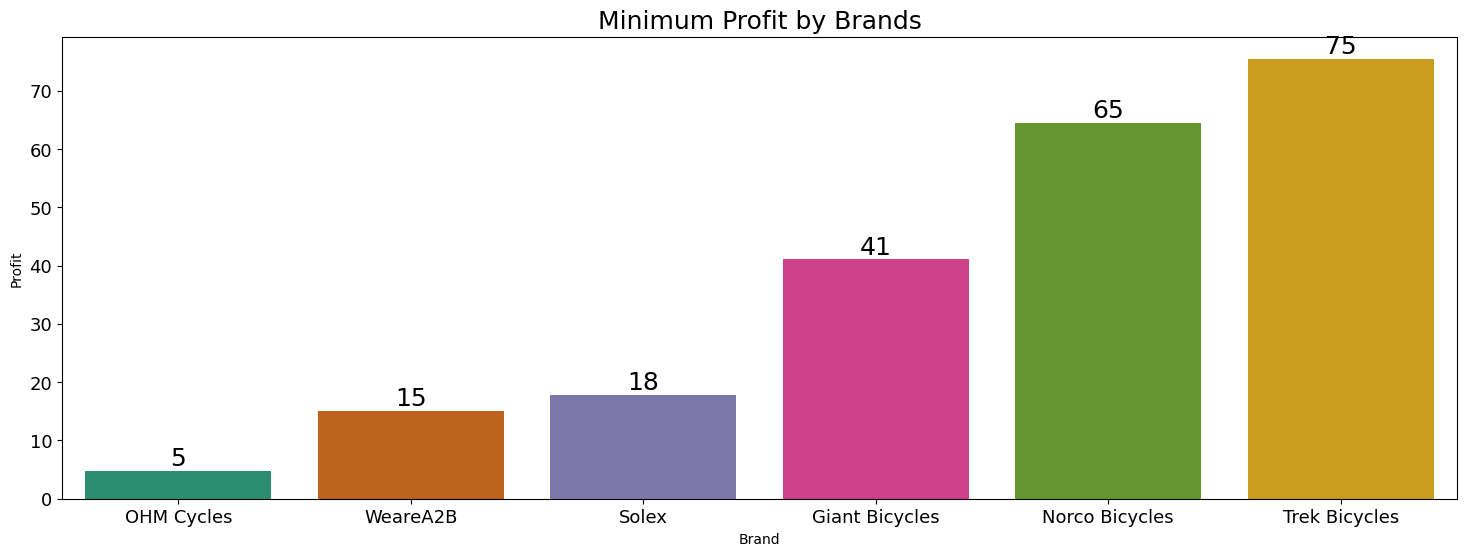

In [64]:
minimum_profit = df.groupby("brand")["Profit"].agg("min").sort_values()
minimum_profit = pd.DataFrame(minimum_profit).reset_index()
minimum_profit.columns = ["Brand", "Profit"]

plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Brand", y = "Profit", data = minimum_profit, palette = "Dark2")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Minimum Profit by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Sum of Profits by Brands

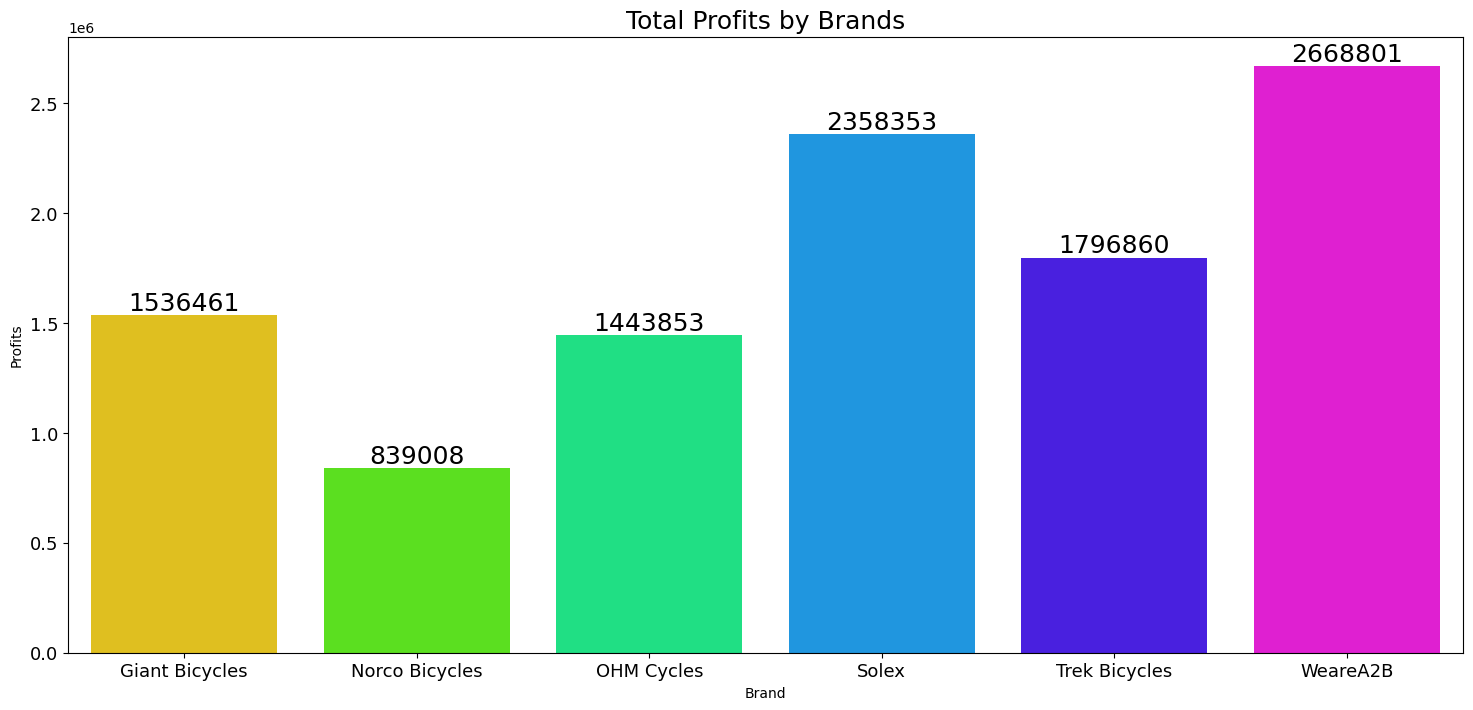

In [65]:
profitable = df.groupby("brand")["Profit"].agg(["sum"]).reset_index()
profitable.columns = ["Brand", "Profits"]


plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Brand", y = "Profits", data = profitable, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Total Profits by Brands", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()
     

**Gender**

Gender by highest and lowest age

In [66]:
gender = df.groupby("gender")["Age"].agg(["max", "min"])
gender

,max,min
gender,,
Female,88,21
Male,92,21


<Figure size 1800x600 with 0 Axes>

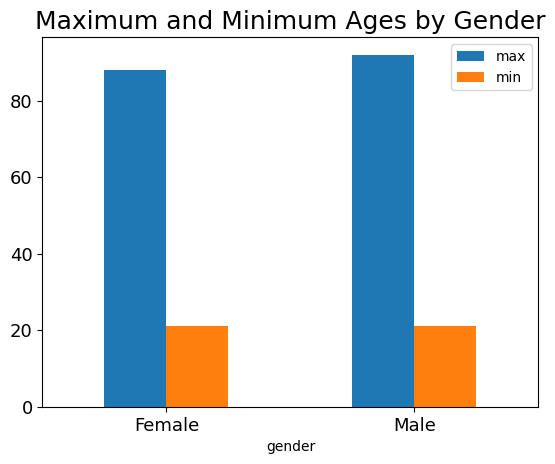

In [67]:
plt.figure(figsize = (18, 6))
gender.plot(kind = "bar", rot = 0)
plt.title("Maximum and Minimum Ages by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Past 3 Years Bike Related Purchases

In [68]:
bikes = df["past_3_years_bike_related_purchases"].value_counts()
bikes = pd.DataFrame(bikes).reset_index()
bikes.columns = ["Purchases", "Count"]
bikes.head()

,Purchases,Count
0,16,287
1,80,274
2,2,265
3,48,263
4,13,261


Maximum Purchases by Past 3 Years Bike Related Purchases

In [69]:
max_bikes = bikes.sort_values(by = "Purchases", ascending = False)
max_bikes.head()

,Purchases,Count
33,99,223
10,98,252
29,97,227
20,96,238
94,95,141


Minimum Purchases by Past 3 Years Bike Related Purchases

In [70]:
min_bikes = bikes.sort_values(by = "Purchases", ascending = True)
min_bikes.head()

,Purchases,Count
60,0,194
84,1,171
2,2,265
95,3,136
74,4,183


**Jobs**

Highest Number of People From Different Jobs

In [71]:
jobs = df["job_title"].value_counts()
jobs = pd.DataFrame(jobs).reset_index()
jobs.columns = ["Job Title", "People"]
jobs.head()

,Job Title,People
0,Social Worker,230
1,Business Systems Development Analyst,218
2,Nuclear Power Engineer,212
3,Legal Assistant,210
4,Internal Auditor,208


Lowest Number of People From Different Jobs

In [72]:
jobs = df["job_title"].value_counts().sort_values(ascending = True)
jobs = pd.DataFrame(jobs).reset_index()
jobs.columns = ["Job Title", "People"]
jobs.head()

,Job Title,People
0,Developer I,10
1,Research Assistant III,11
2,Geologist II,11
3,Automation Specialist IV,16
4,Administrative Assistant I,16


**Job Categories**

Number of People From Job Categories

In [73]:
category = df["job_industry_category"].value_counts()
category = pd.DataFrame(category).reset_index()
category.columns = ["Category", "People"]
category

,Category,People
0,Manufacturing,4199
1,Financial Services,4043
2,Health,3226
3,Retail,1836
4,Property,1353
5,IT,735
6,Entertainment,734
7,Argiculture,604
8,Telecommunications,379


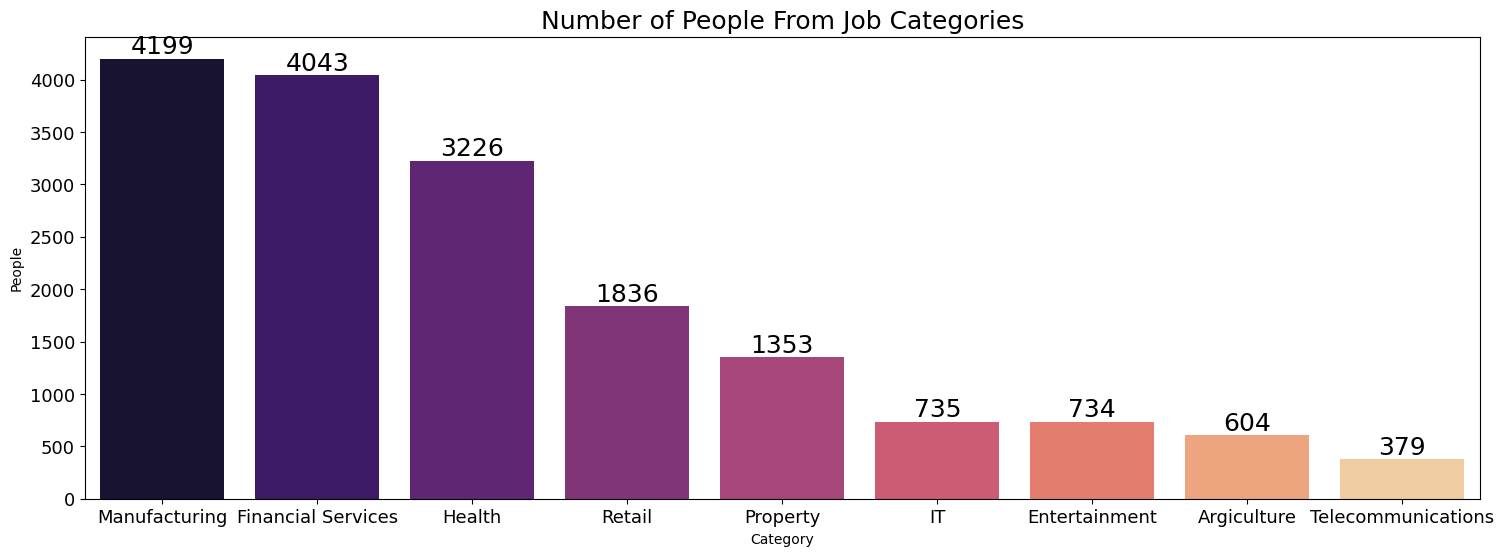

In [74]:
plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Category", y = "People", data = category, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Number of People From Job Categories", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Transactions by People of Different Industries

In [75]:
trans_cat = df.groupby(["job_industry_category", "gender"])["gender"].agg(["count"])
trans_cat = trans_cat.reset_index()
trans_cat.columns = ["Industry", "Gender", "People"]
trans_cat

,Industry,Gender,People
0,Argiculture,Female,330
1,Argiculture,Male,274
2,Entertainment,Female,348
3,Entertainment,Male,386
4,Financial Services,Female,2035
5,Financial Services,Male,2008
6,Health,Female,1631
7,Health,Male,1595
8,IT,Female,380
9,IT,Male,355


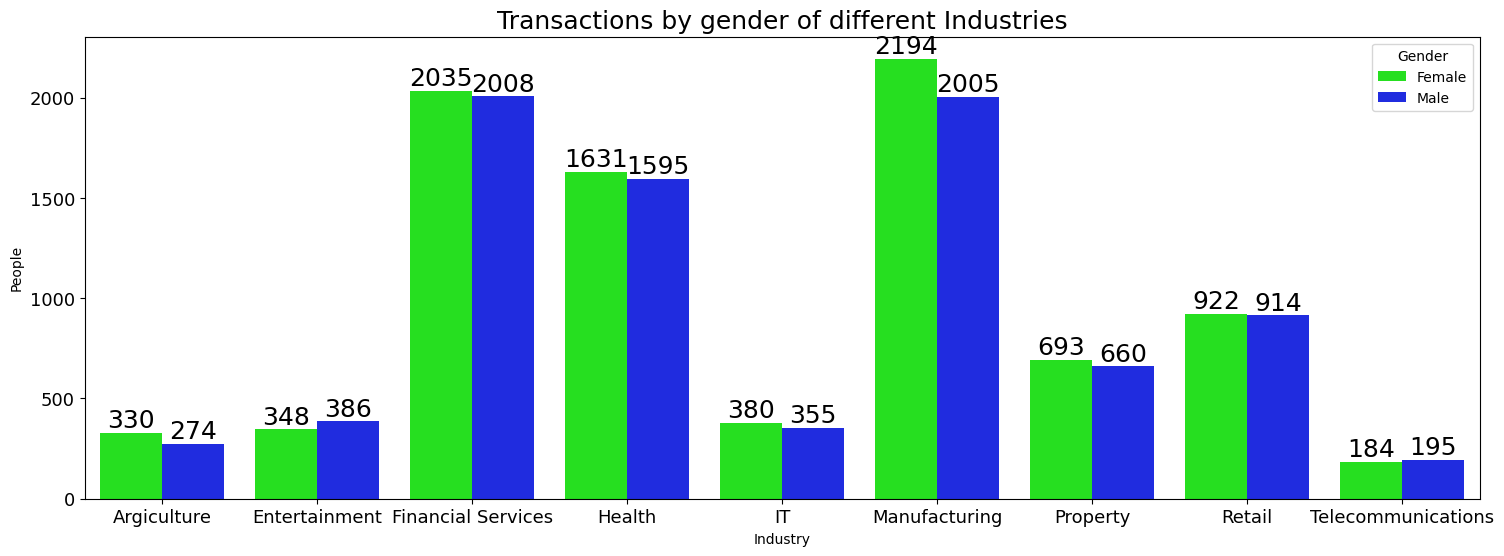

In [76]:
plt.figure(figsize = (18, 6))
graph = sns.barplot(x = "Industry", y = "People", hue = "Gender", data = trans_cat, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Transactions by gender of different Industries", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [77]:
pivot = trans_cat.pivot_table(values = "People", index = "Industry", columns = "Gender")
pivot.columns.name = None
pivot.index.name = None
pivot

,Female,Male
Argiculture,330,274
Entertainment,348,386
Financial Services,2035,2008
Health,1631,1595
IT,380,355
Manufacturing,2194,2005
Property,693,660
Retail,922,914
Telecommunications,184,195


**Segment**

Wealth Segement of Customers

In [78]:
wealth = df["wealth_segment"].value_counts()
wealth = pd.DataFrame(wealth).reset_index()
wealth.columns = ["Segment", "People"]
wealth

,Segment,People
0,Mass Customer,10282
1,High Net Worth,5214
2,Affluent Customer,5000


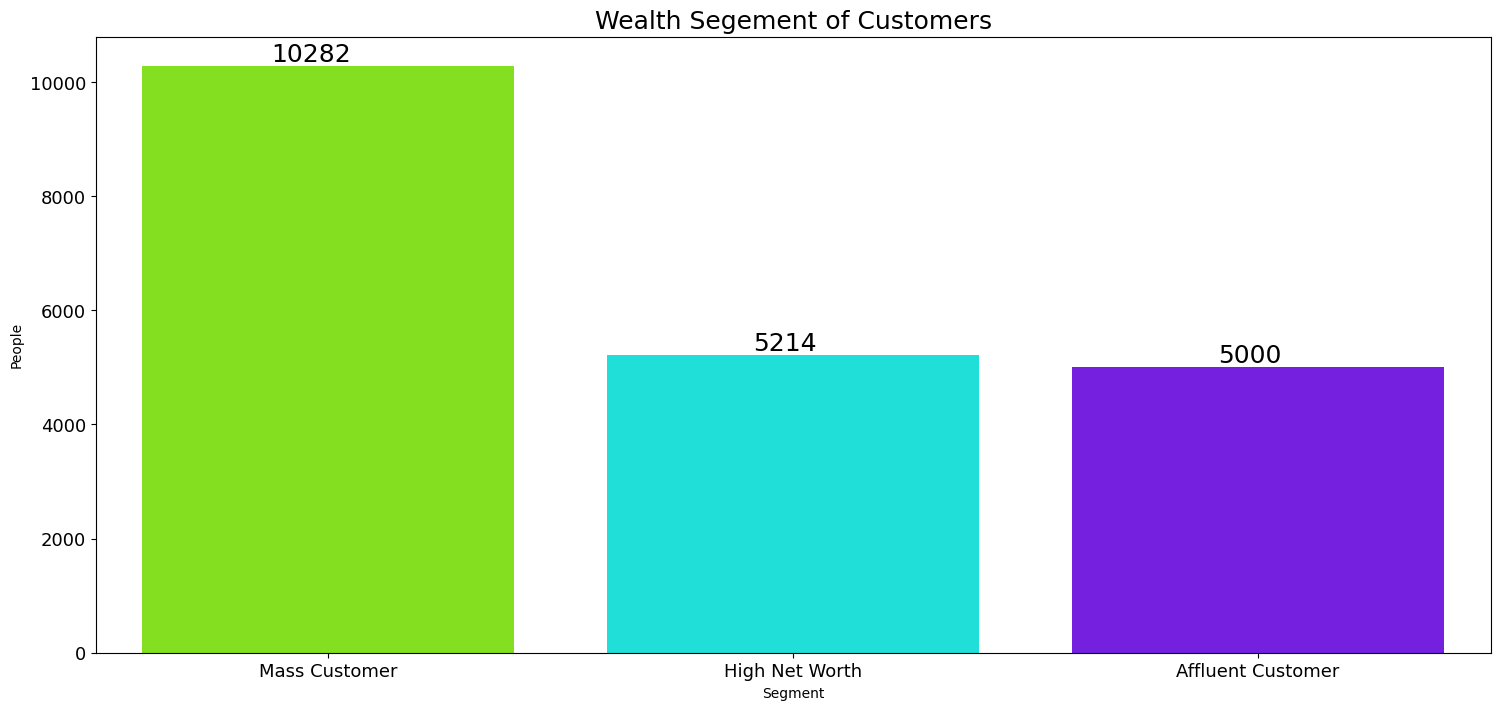

In [79]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Segment", y = "People", data = wealth, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Wealth Segement of Customers", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Wealth Segments of Customers by Gender

In [80]:
wealth_gender = df.groupby(["wealth_segment", "gender"])["gender"].agg(["count"]).reset_index()
wealth_gender.columns = ["Segment", "Gender", "Count"]
wealth_gender

,Segment,Gender,Count
0,Affluent Customer,Female,2475
1,Affluent Customer,Male,2525
2,High Net Worth,Female,2644
3,High Net Worth,Male,2570
4,Mass Customer,Female,5391
5,Mass Customer,Male,4891


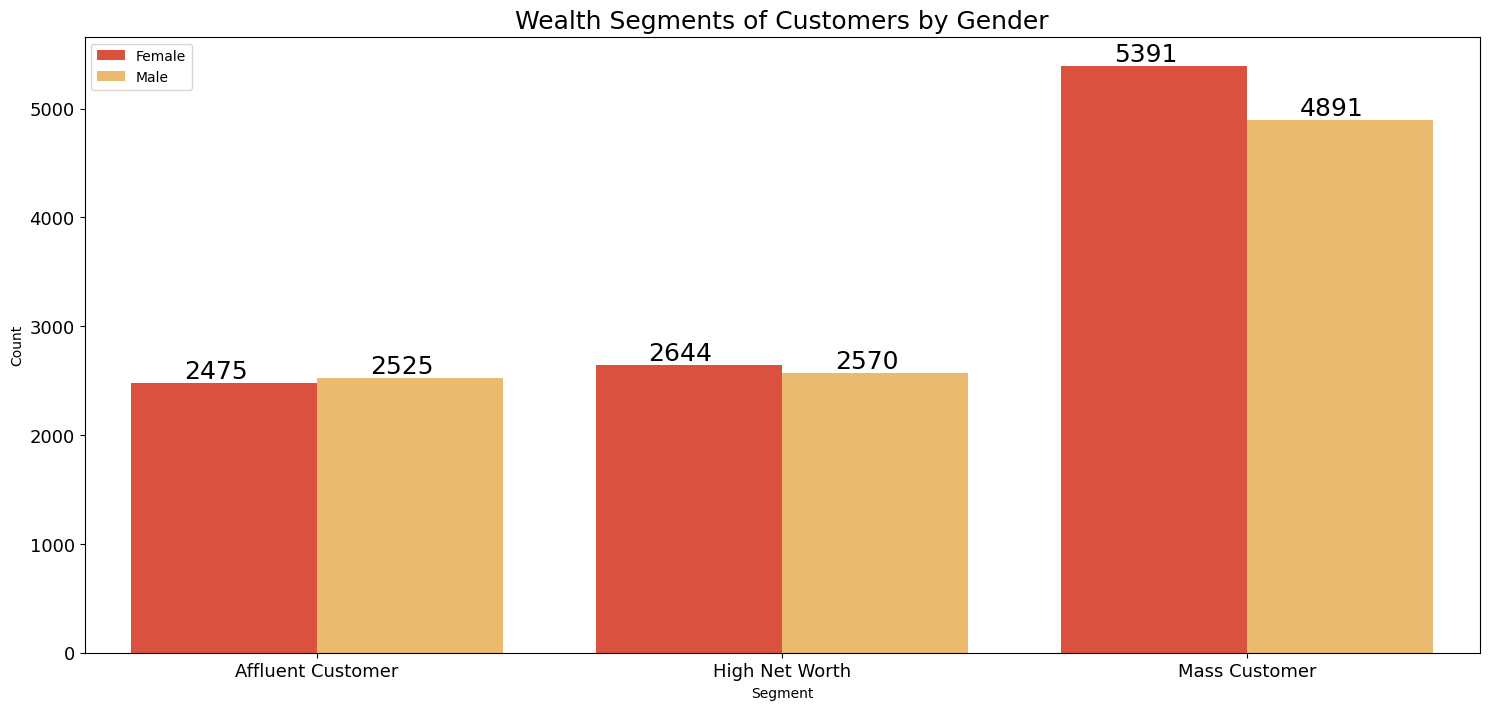

In [81]:
plt.figure(figsize =(18, 8))
graph = sns.barplot(x = "Segment", y = "Count", hue = "Gender", data = wealth_gender, palette = "YlOrRd_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.25, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Wealth Segments of Customers by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend(loc = "upper left")
plt.show()

Deceased Indicators

In [83]:
di = df["deceased_indicator"].value_counts()
di = pd.DataFrame(di).reset_index()
di.columns = ["Status", "Deceased Indicators"]
di

,Status,Deceased Indicators
0,No,20488
1,Yes,8


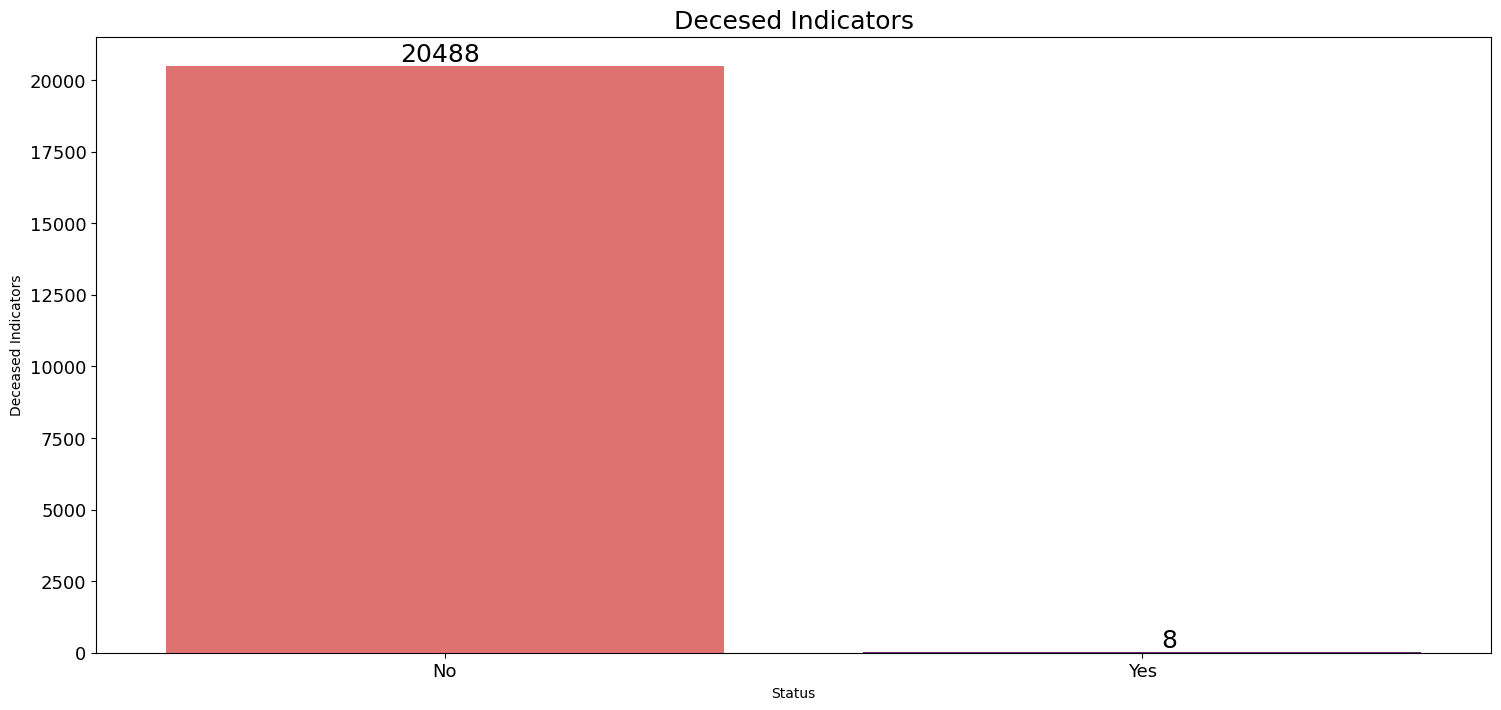

In [84]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Status", y = "Deceased Indicators", data = di, palette = "magma_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Decesed Indicators", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

All deceased indicators are female

In [85]:
d_i = df.groupby(["first_name", "last_name", "Age", "state", "deceased_indicator", "gender"])["gender"].agg(["count"]).reset_index()
d_i.columns = ["First Name", "Last Name", "Age", "State", "Deceased Indicator", "Gender", "Count"] 
d_i = d_i[d_i["Deceased Indicator"] == "Yes"]
d_i

,First Name,Last Name,Age,State,Deceased Indicator,Gender,Count
2157,Josy,St. Quentin,53,New South Wales,Yes,Female,8


**Cars**

Count Number of Customers having Cars

In [86]:
cars = df["owns_car"].value_counts()
cars = pd.DataFrame(cars).reset_index()
cars.columns = ["Owns Car", "People"]
cars

,Owns Car,People
0,Yes,10272
1,No,10224


Count Cars by gender

In [87]:
car_gender = df.groupby(["owns_car", "gender"])["gender"].agg(["count"]).reset_index()
car_gender.columns = ["Owns Car", "Gender", "People"]
car_gender

,Owns Car,Gender,People
0,No,Female,5154
1,No,Male,5070
2,Yes,Female,5356
3,Yes,Male,4916


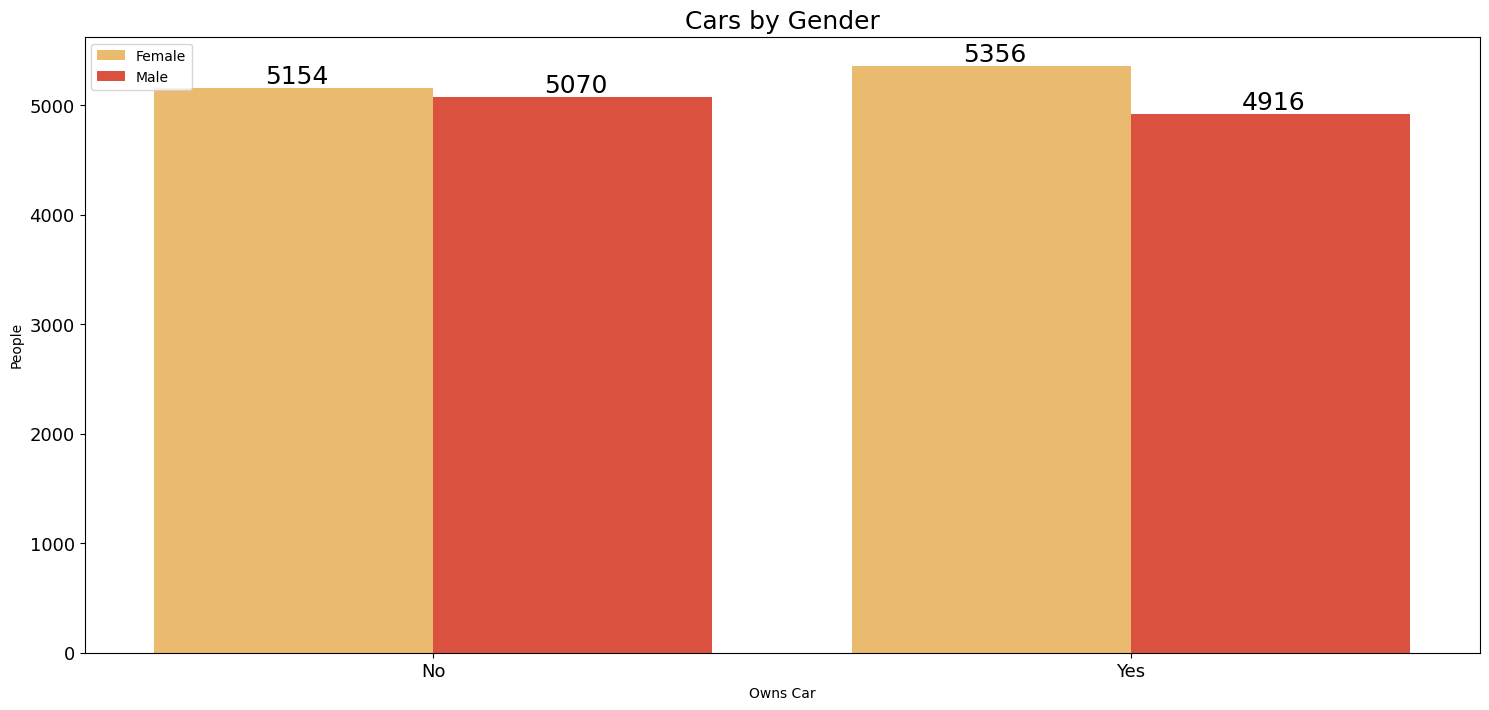

In [88]:

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Owns Car", y = "People", hue = "Gender", data = car_gender, palette = "YlOrRd")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.25, p.get_height()),
                       ha='right', va='bottom',color= 'black', size = 18)
plt.title("Cars by Gender", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend(loc='upper left')
plt.show()

Cars by Job Industry Category

In [89]:
car_job = df.groupby(["owns_car", "job_industry_category", ])["owns_car"].agg(["count"]).reset_index()
car_job = car_job[car_job.owns_car != "No"]
car_job = car_job.drop(columns = ["owns_car"])
car_job.columns = ["Industry", "Cars"]
car_job

,Industry,Cars
9,Argiculture,327
10,Entertainment,305
11,Financial Services,2169
12,Health,1594
13,IT,390
14,Manufacturing,2056
15,Property,715
16,Retail,901
17,Telecommunications,177


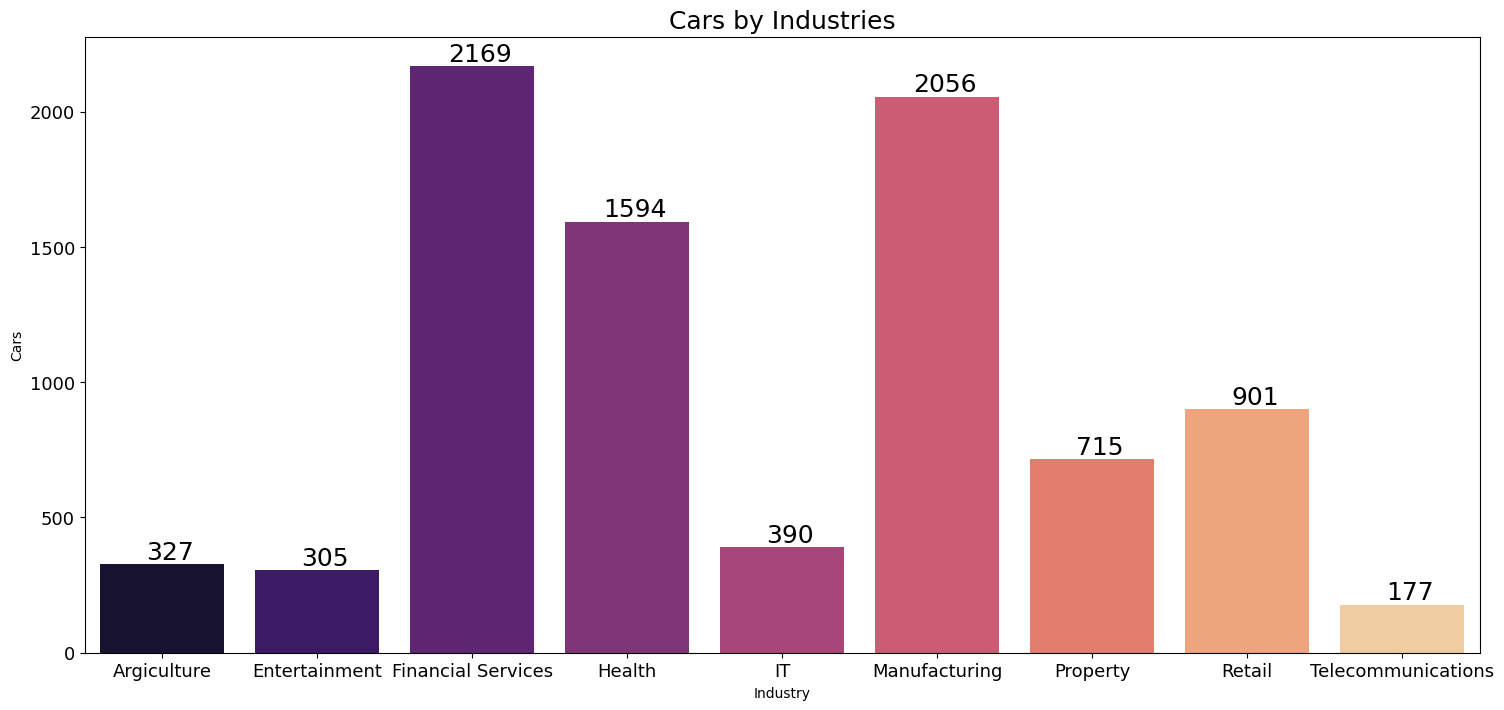

In [90]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Industry", y = "Cars", data = car_job, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.45, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cars by Industries", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Cars by Wealth Segment

In [91]:
car_wealth = df.groupby(["wealth_segment", "owns_car"])["owns_car"].agg(["count"]).reset_index()
car_wealth = car_wealth[car_wealth["owns_car"] == "Yes"]
car_wealth = car_wealth.drop(columns = ["owns_car"])
car_wealth.columns = ["Segment", "Cars"]
car_wealth

,Segment,Cars
1,Affluent Customer,2633
3,High Net Worth,2617
5,Mass Customer,5022


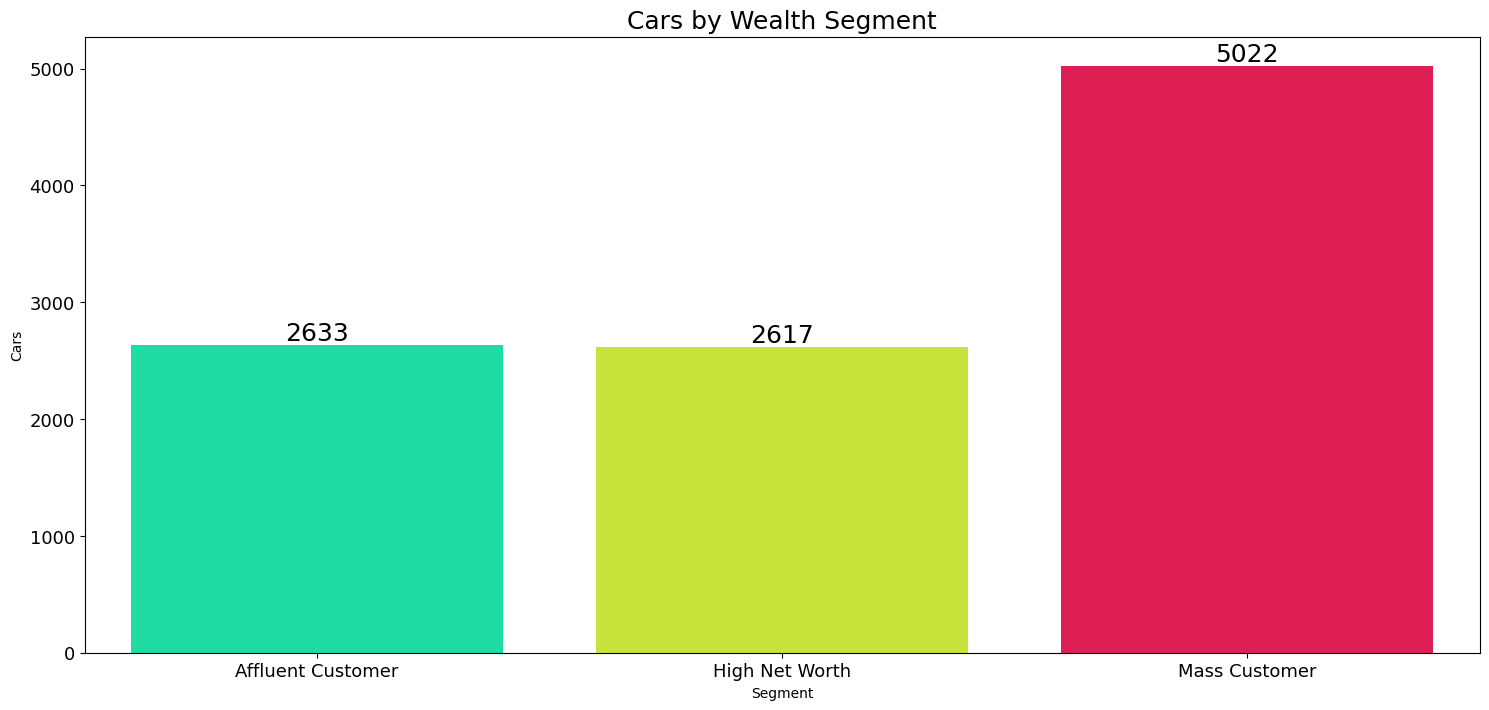

In [92]:
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "Segment", y = "Cars", data = car_wealth, palette = "gist_ncar")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)

plt.title("Cars by Wealth Segment", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

Cars by State

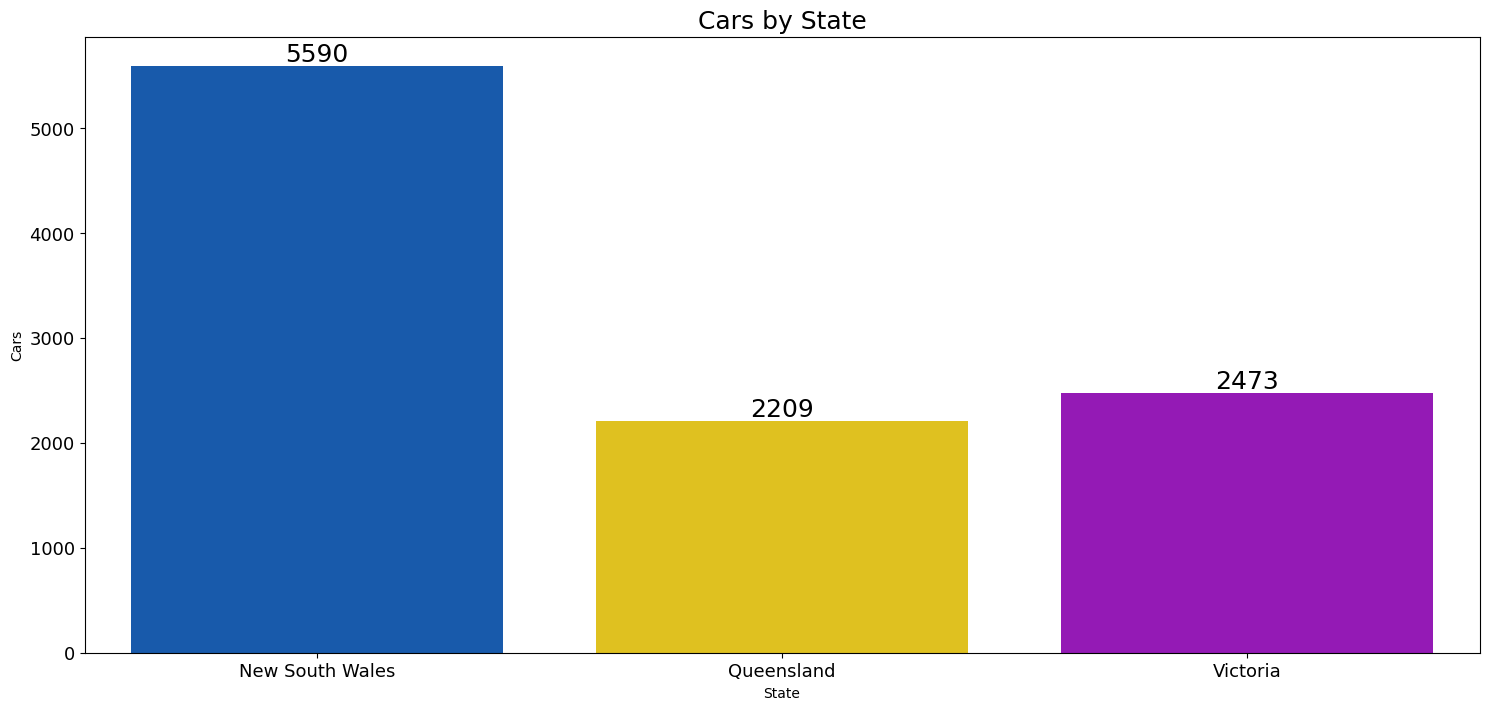

In [93]:
state_cars = df.groupby(["state", "owns_car"])["owns_car"].agg(["count"]).reset_index()
state_cars = state_cars[state_cars["owns_car"] == "Yes"]
state_cars = state_cars.drop(columns = ["owns_car"])
state_cars.columns = ["State", "Cars"]

plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "State", y = "Cars", data = state_cars, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+ 0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Cars by State", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

**States**

Number of Customers in States

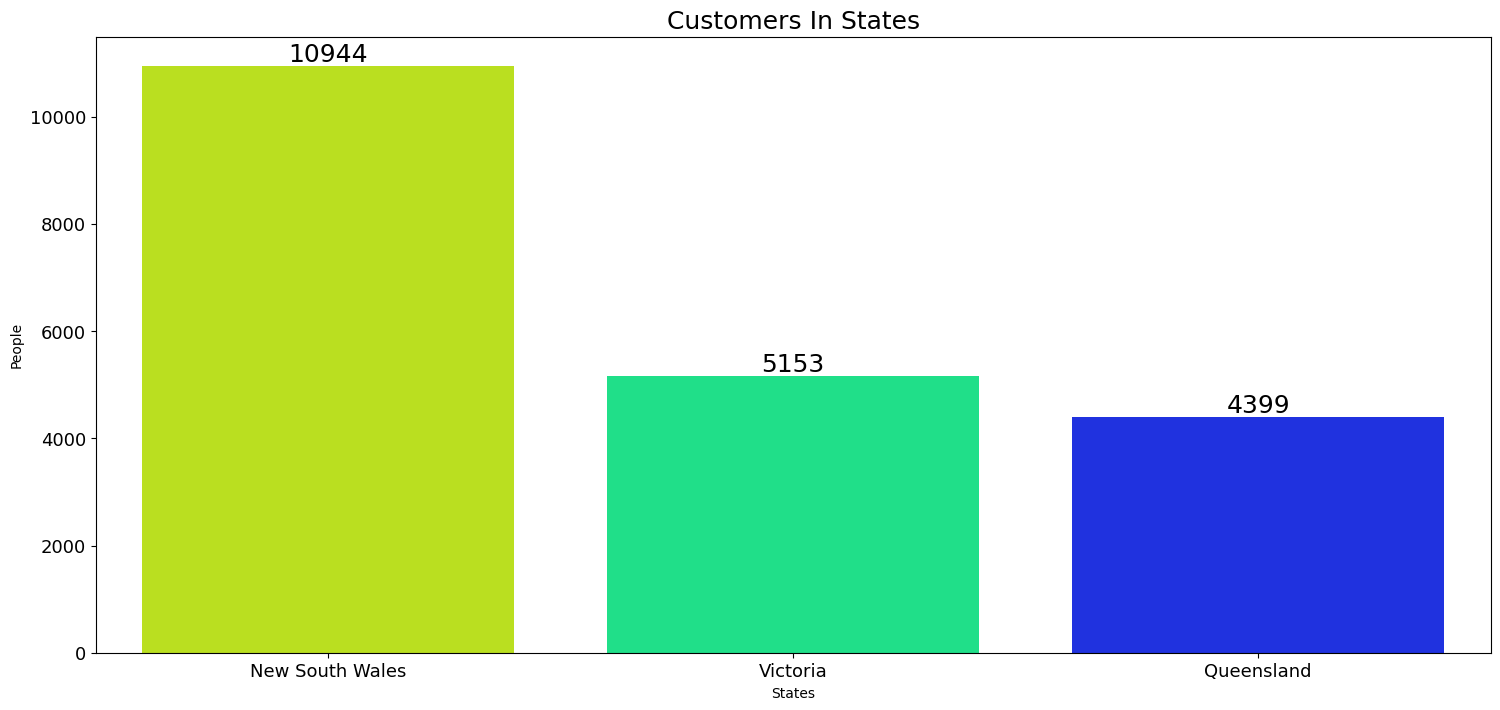

In [95]:
customer_states = df["state"].value_counts().reset_index()
customer_states.columns = ["States", "People"]
plt.figure(figsize = (18, 8))
graph = sns.barplot(x = "States", y = "People", data = customer_states, palette = "gist_rainbow") 
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 18)
plt.title("Customers In States", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()